In [1]:
import  requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import os
import school_analysis as sa

url = "https://www.kmk.org/dokumentation-statistik/statistik/schulstatistik/schulstatistische-informationen-zur-covid-19-pandemie.html"
archiv_url = "https://www.kmk.org/de/dokumentation-statistik/statistik/schulstatistik/schulstatistische-informationen-zur-covid-19-pandemie/archiv.html"

def download_files(url_list, target_folder):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    for url_item in url_list:
        response = requests.get(url_item)
        if response.status_code == 200:
            file_name = url_item.split('/')[-1]
            file_path = os.path.join(target_folder, file_name)
            with open(file_path, 'wb') as file:
                file.write(response.content)
        else:
            print(f"Download failed for {url_item}")

def scrape_xlsx_links(p_url):
    # Senden einer Anfrage an die URL
    response = requests.get(p_url, verify=False)

    # Überprüfen, ob die Anfrage erfolgreich war
    if response.status_code != 200:
        return "Fehler beim Abrufen der Webseite."

    # Parsen des HTML-Inhalts
    soup = BeautifulSoup(response.text, 'html.parser')

    # Finden aller Links, die mit .xlsx enden
    xlsx_links = []
    for link in soup.find_all('a', href=True):
        if link['href'].endswith('.xlsx'):
            xlsx_links.append(urljoin(url,link['href']))

    return xlsx_links

links_archiv = scrape_xlsx_links(archiv_url)
links_archiv.reverse()
links = scrape_xlsx_links(url)
links.reverse()
links_orderer = links_archiv + links
target_folder = os.path.join(sa.PROJECT_PATH, 'data', 'raw', "covid")
if not os.path.exists(target_folder):
    os.makedirs(target_folder)
download_files(links_orderer,target_folder)

/home/tomf/.cache/pypoetry/virtualenvs/school-analysis-Zuc5u-dz-py3.11/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.kmk.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/tomf/.cache/pypoetry/virtualenvs/school-analysis-Zuc5u-dz-py3.11/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.kmk.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [2]:
from datetime import datetime
import re
import numpy as np
import os


def first_not_nan(array):
    if not np.any(~np.isnan(array)):
        return None

    index = np.argwhere(~np.isnan(array))[0][0]
    return array[index]


dates = []
states =[]
no_face_to_face_l = []
limited_face_to_face_l = []

import pandas as pd
for filename in os.listdir(target_folder):
    file_path = os.path.join(target_folder, filename)
    if file_path.__contains__("Schularten"):
        continue
    df = pd.read_excel(file_path, header=None)
    date = pd.read_excel(file_path).iloc[3][2]
    states = list(df.iloc[3])[1:][:16]
    no_face_to_face = list(df.iloc[5])[1:][:16]
    limited_face_to_face =list(df.iloc[7])[1:17]

    dates.append(date)
    states = states
    no_face_to_face_l.append(no_face_to_face)
    limited_face_to_face_l.append(limited_face_to_face)

/tmp/ipykernel_8167/1490891588.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  date = pd.read_excel(file_path).iloc[3][2]
/tmp/ipykernel_8167/1490891588.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  date = pd.read_excel(file_path).iloc[3][2]
/tmp/ipykernel_8167/1490891588.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  date = pd.read_excel(file_path).iloc[3][2]
/tmp/ipykernel_8167/1490891588.py:26: FutureWarning: Se

/tmp/ipykernel_8167/2355531983.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


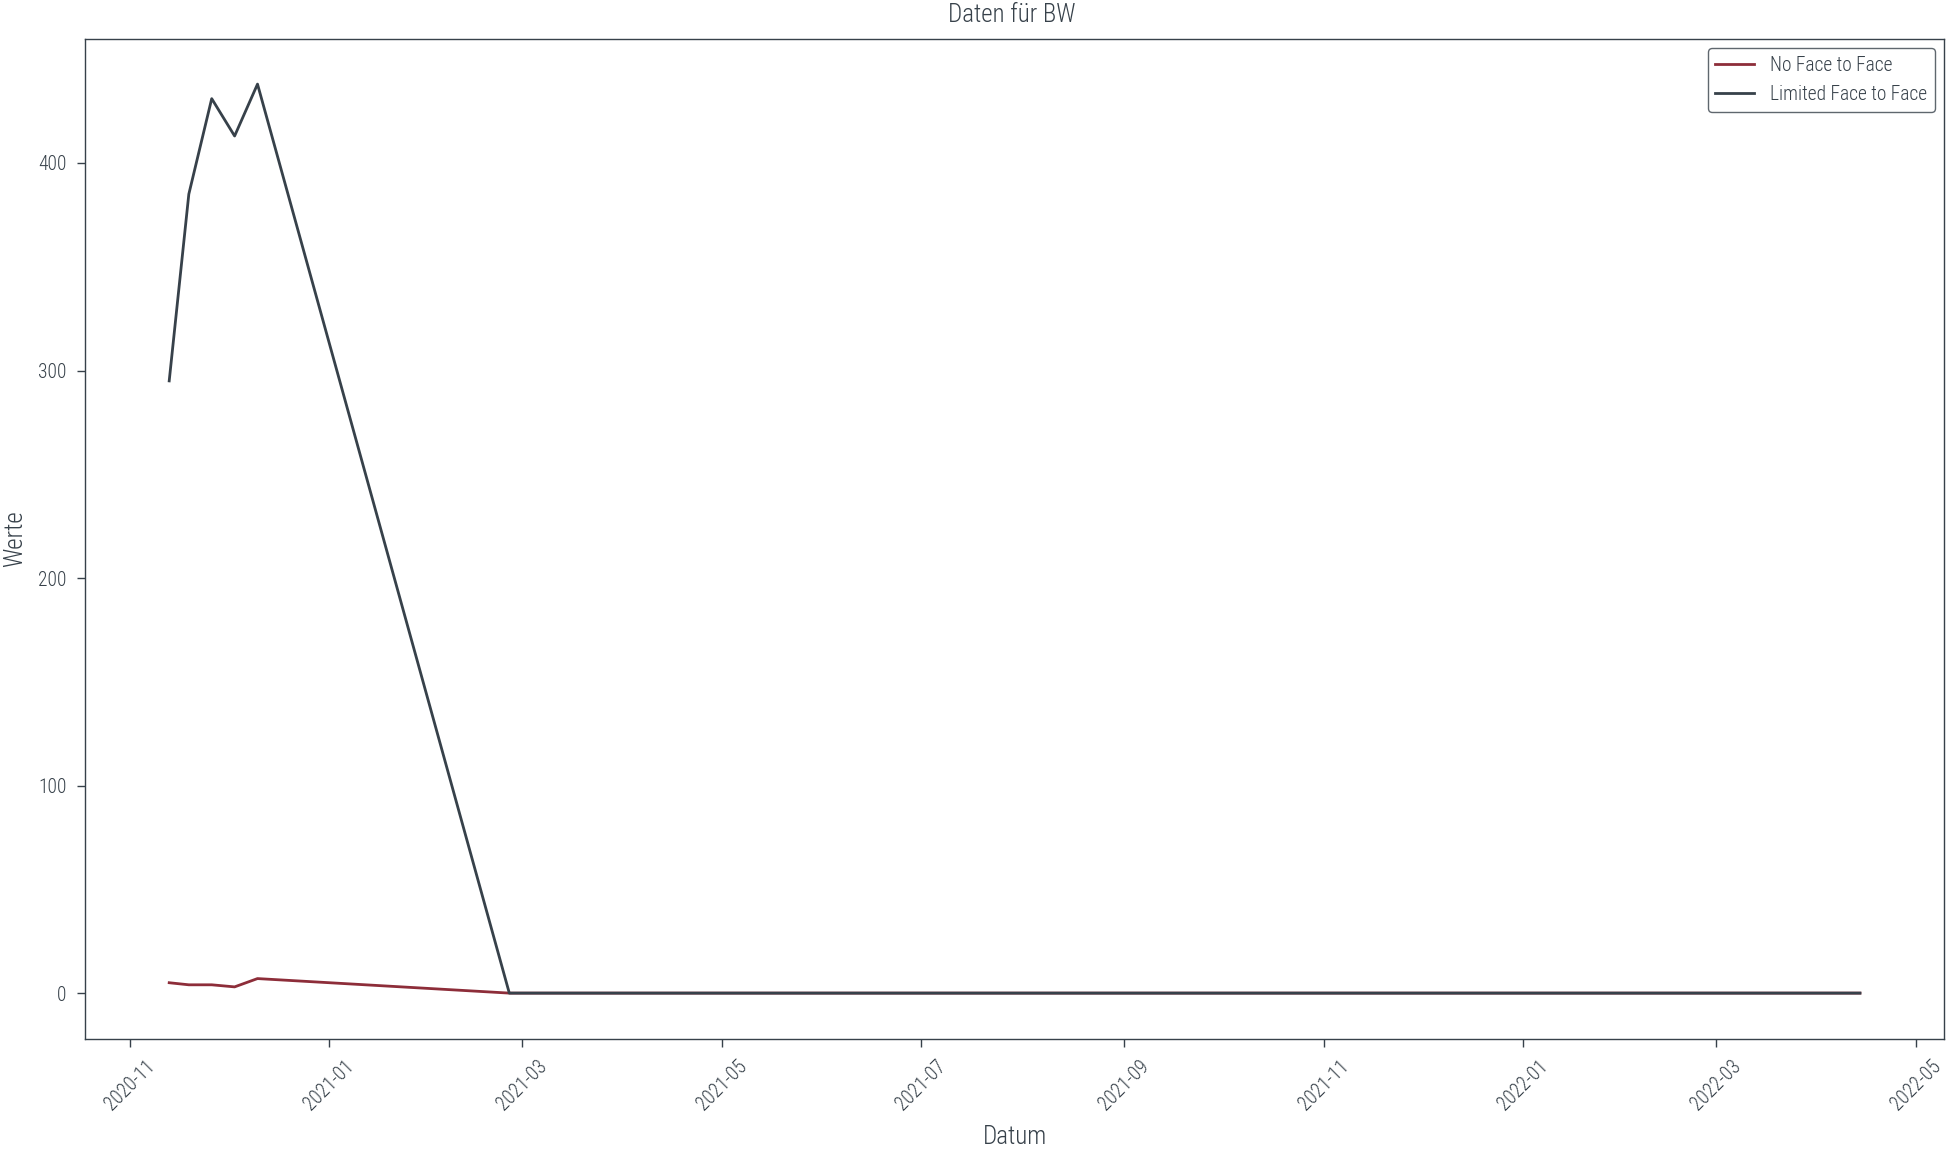

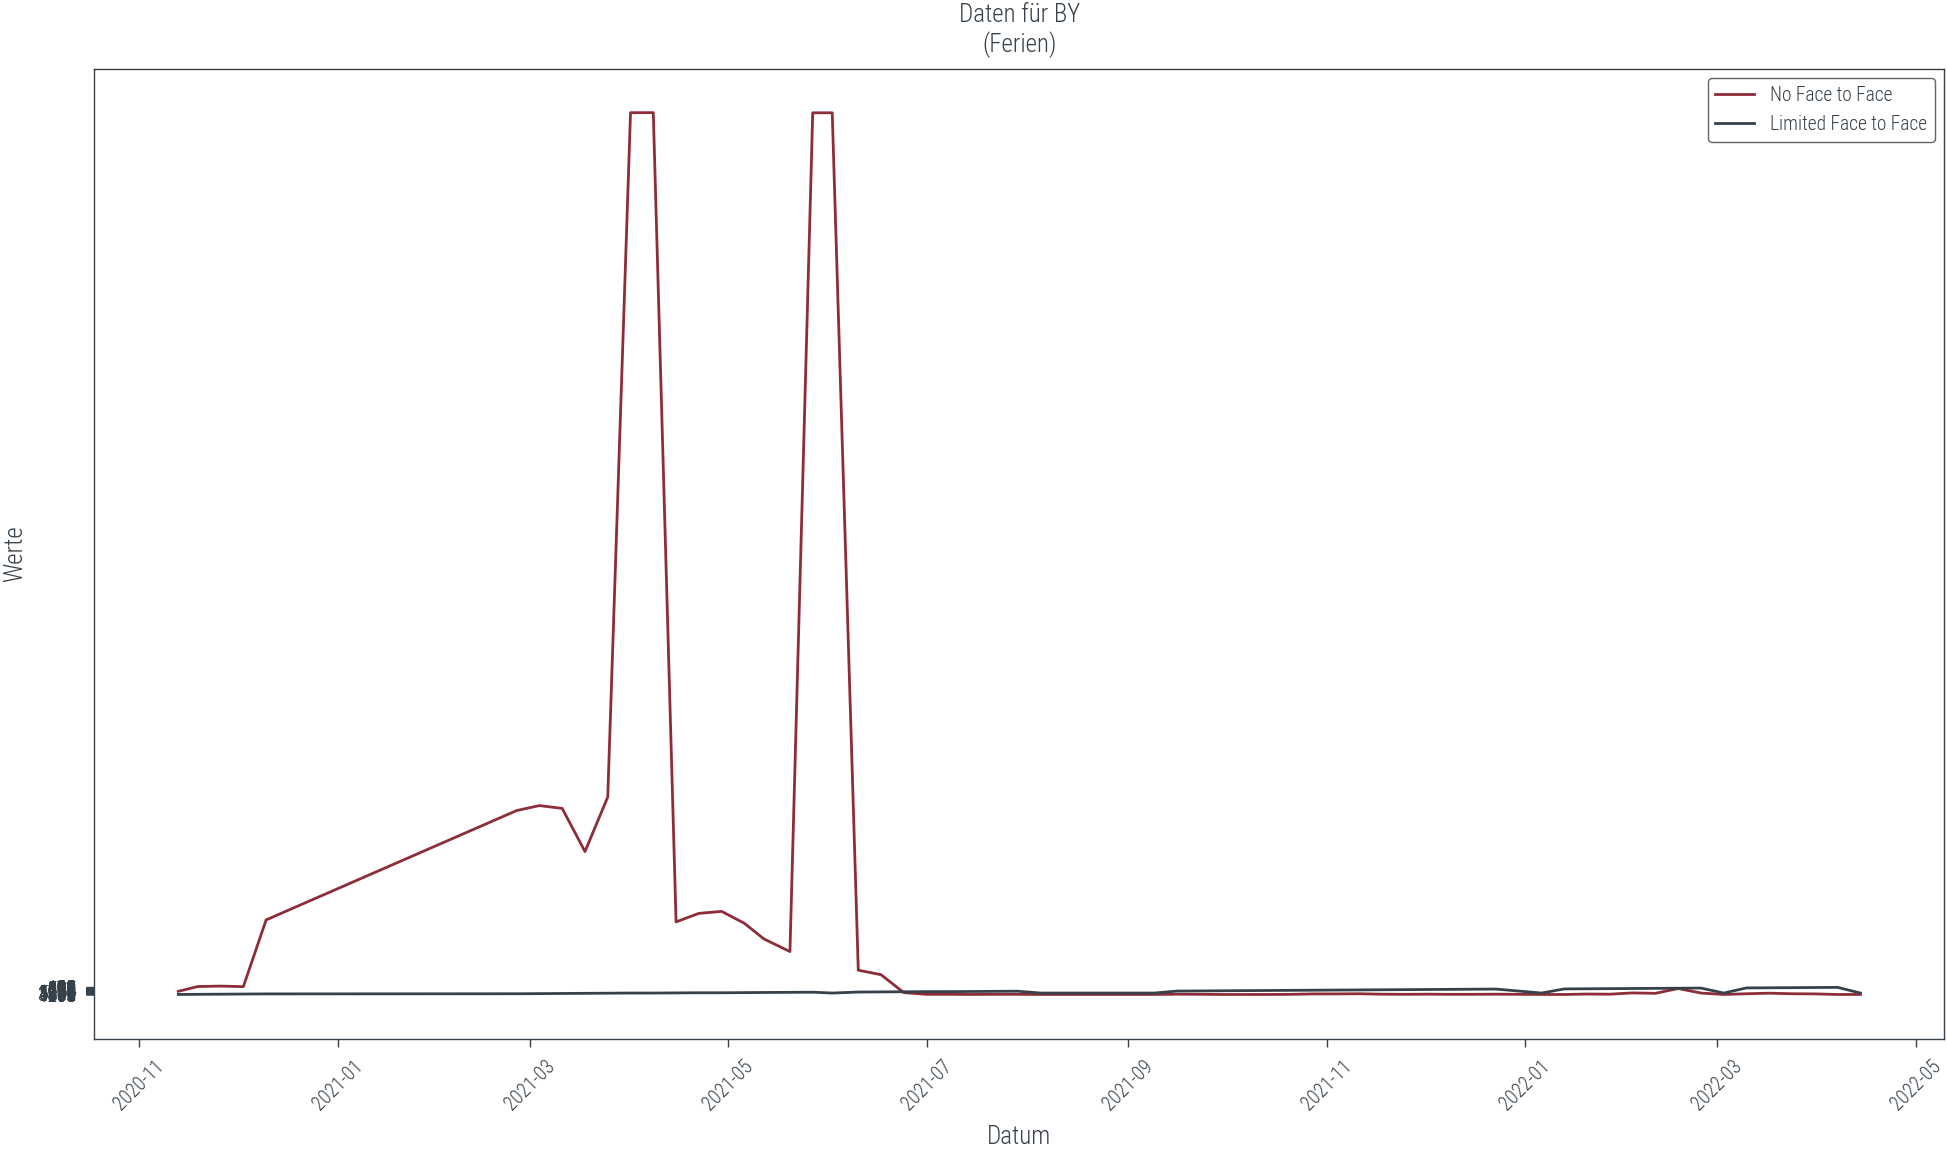

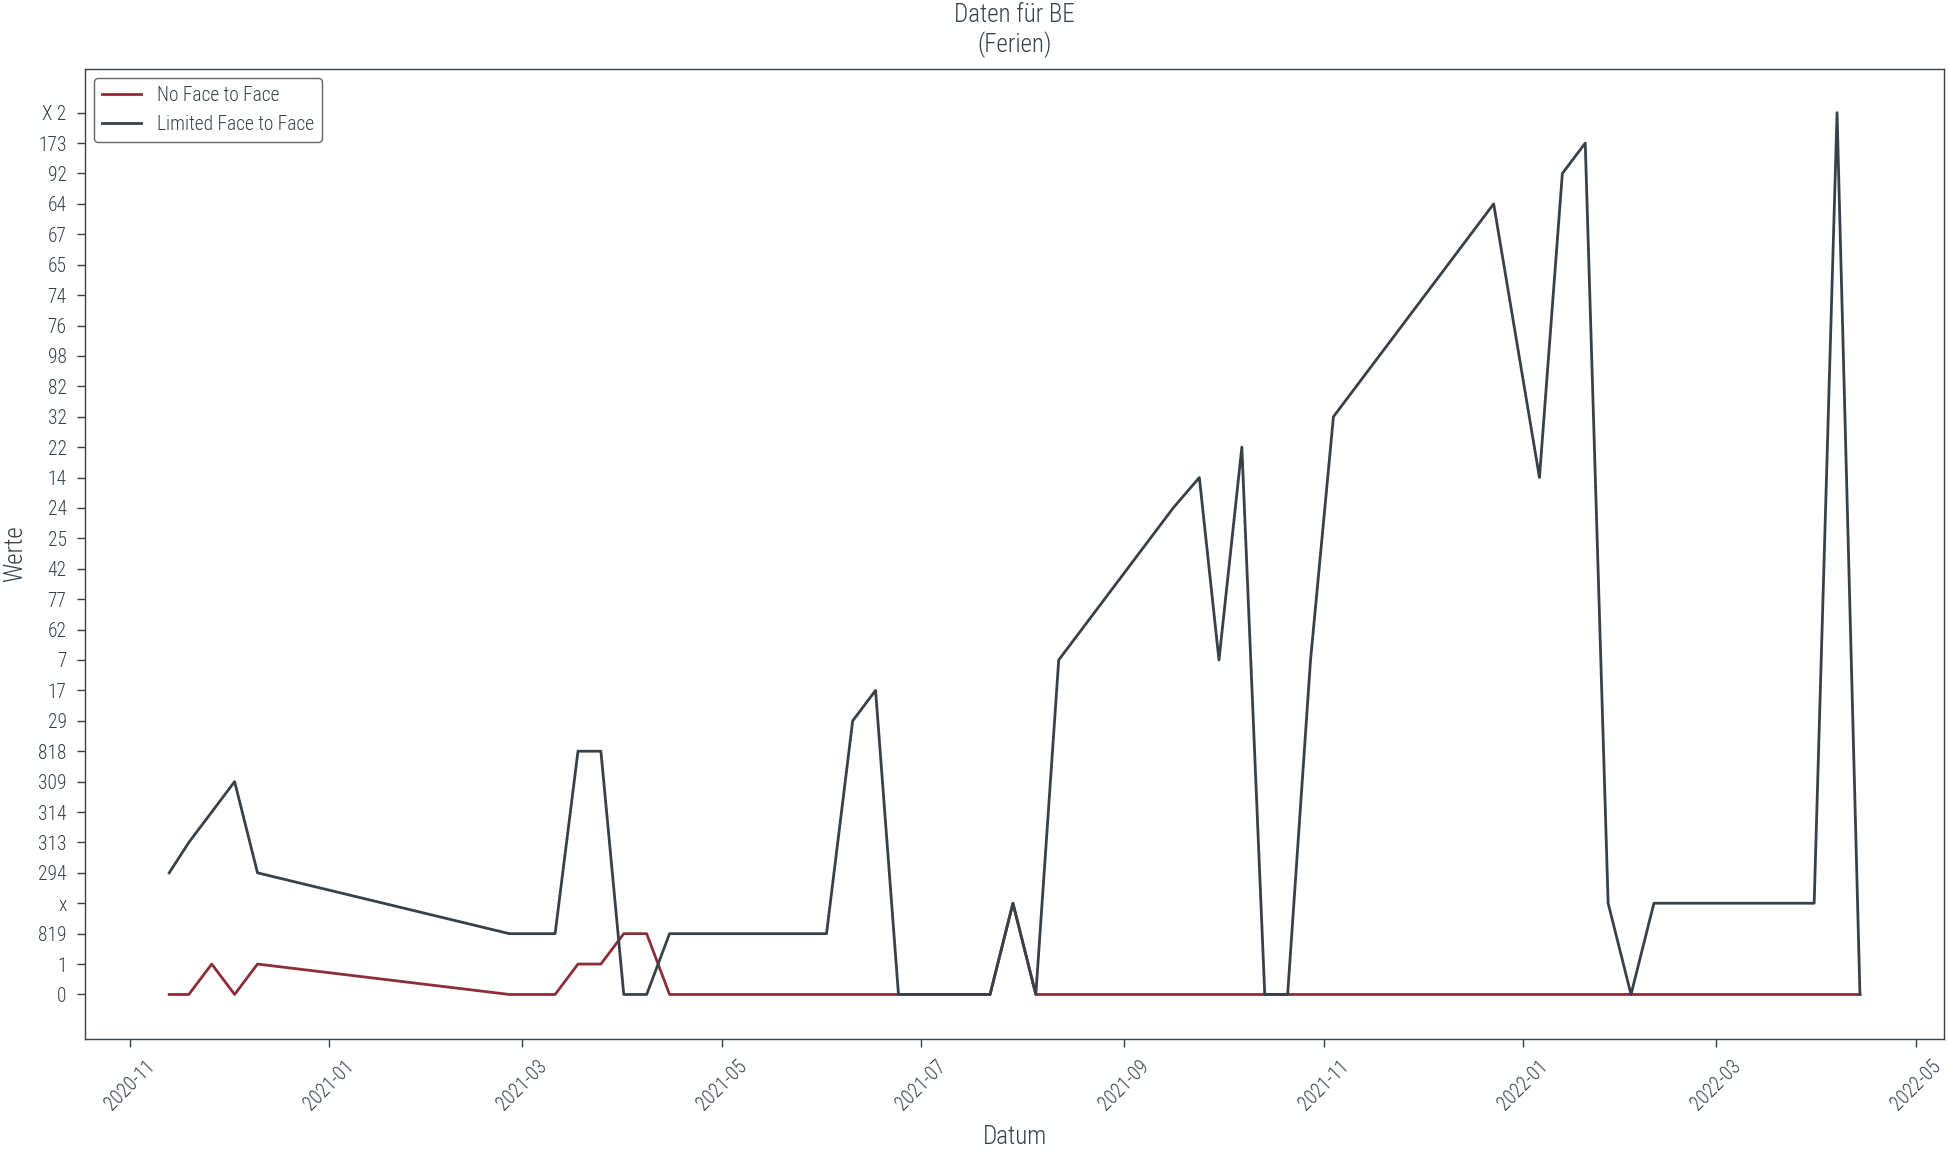

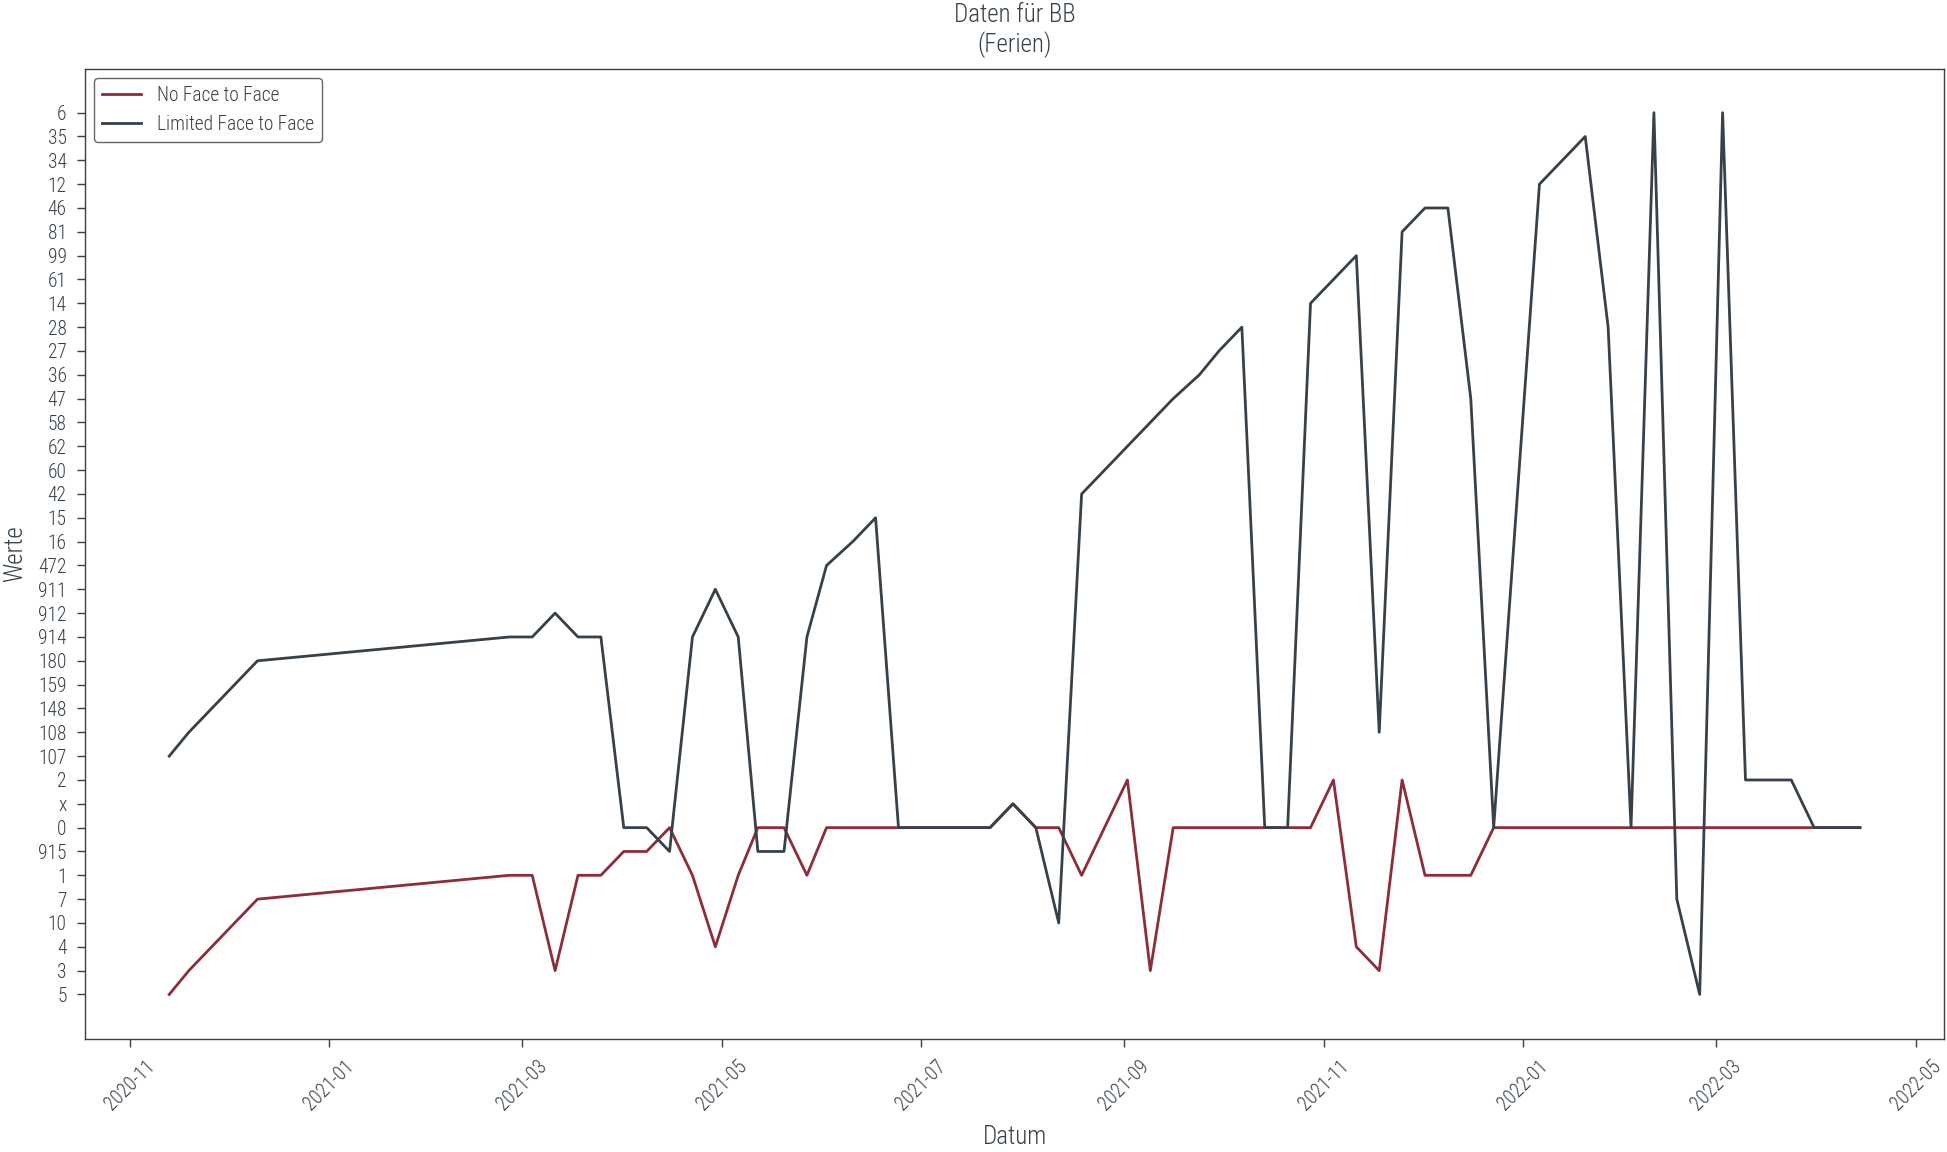

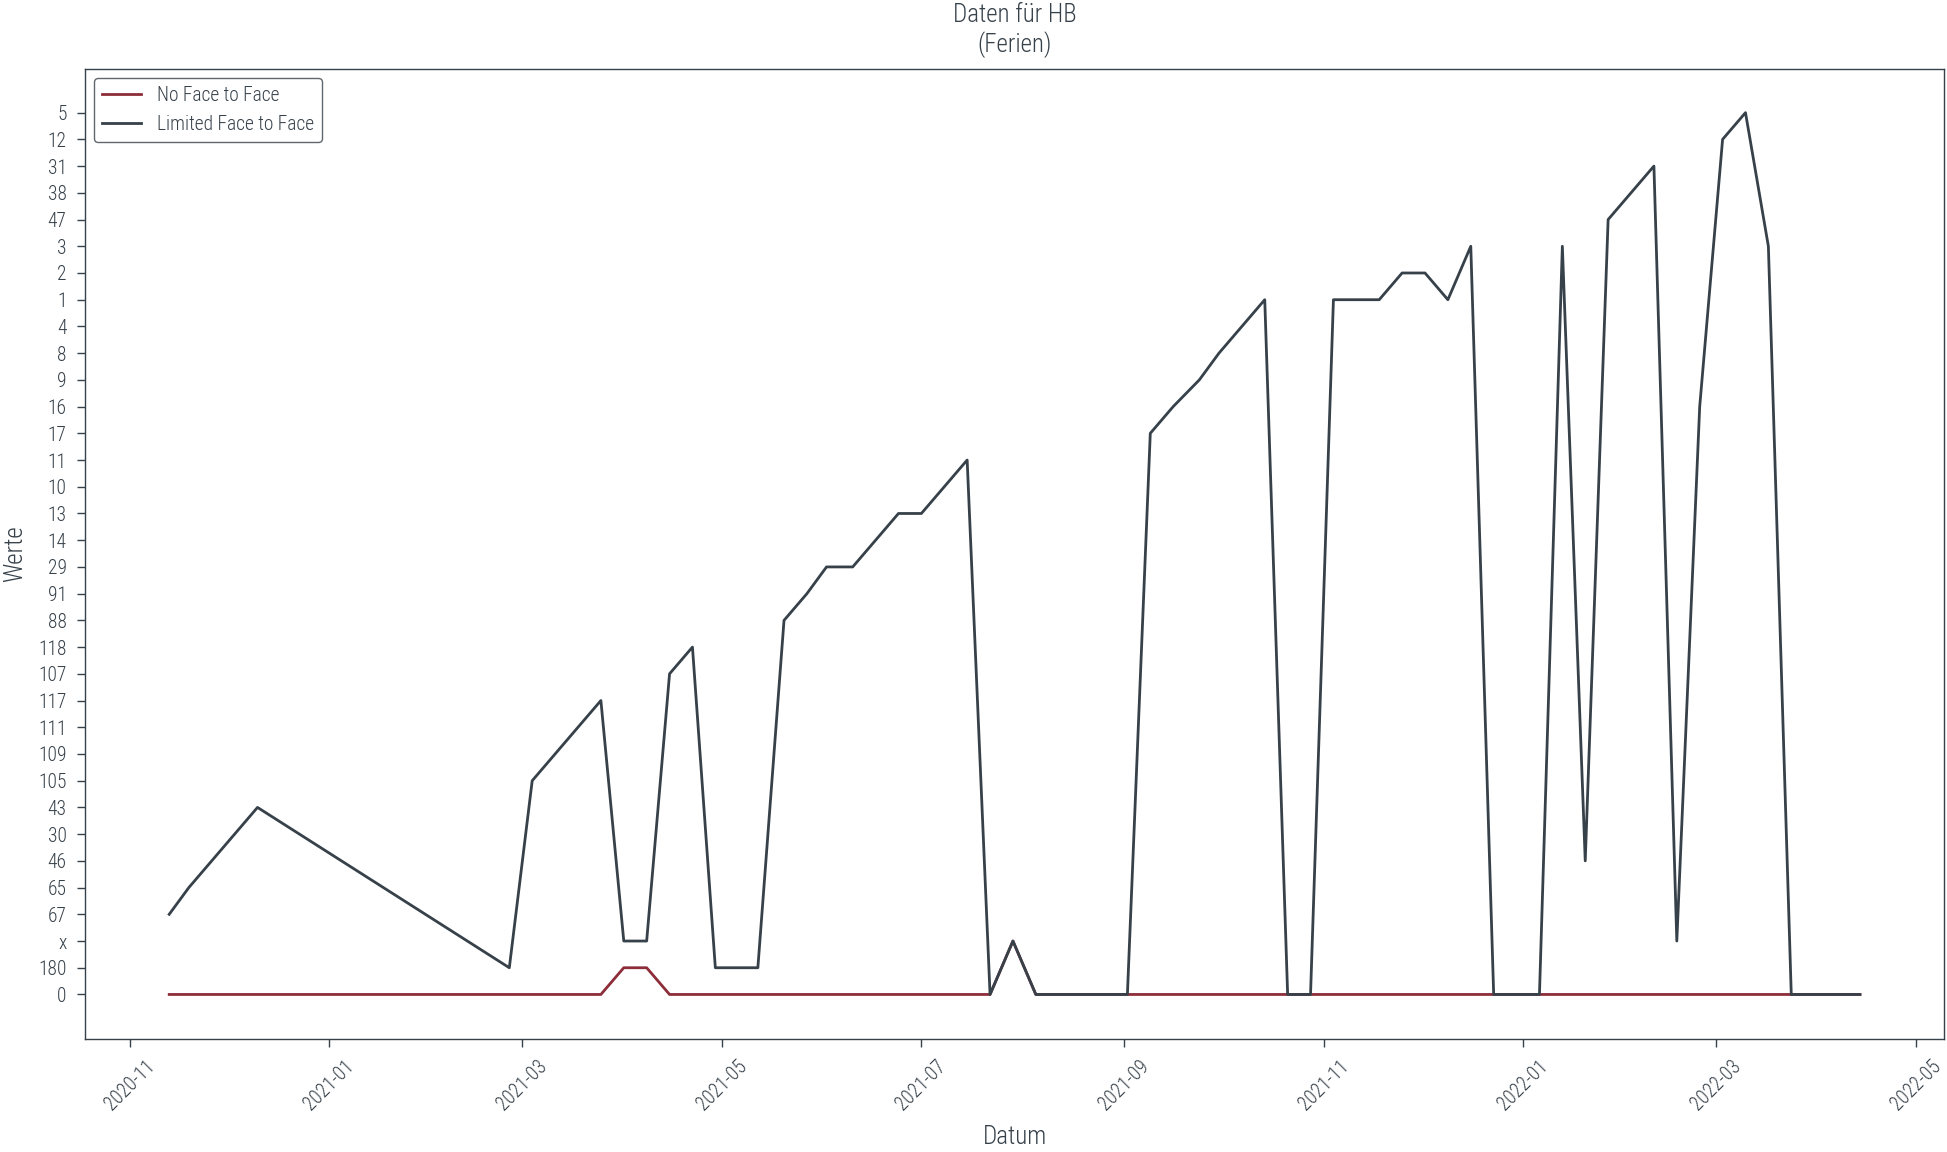

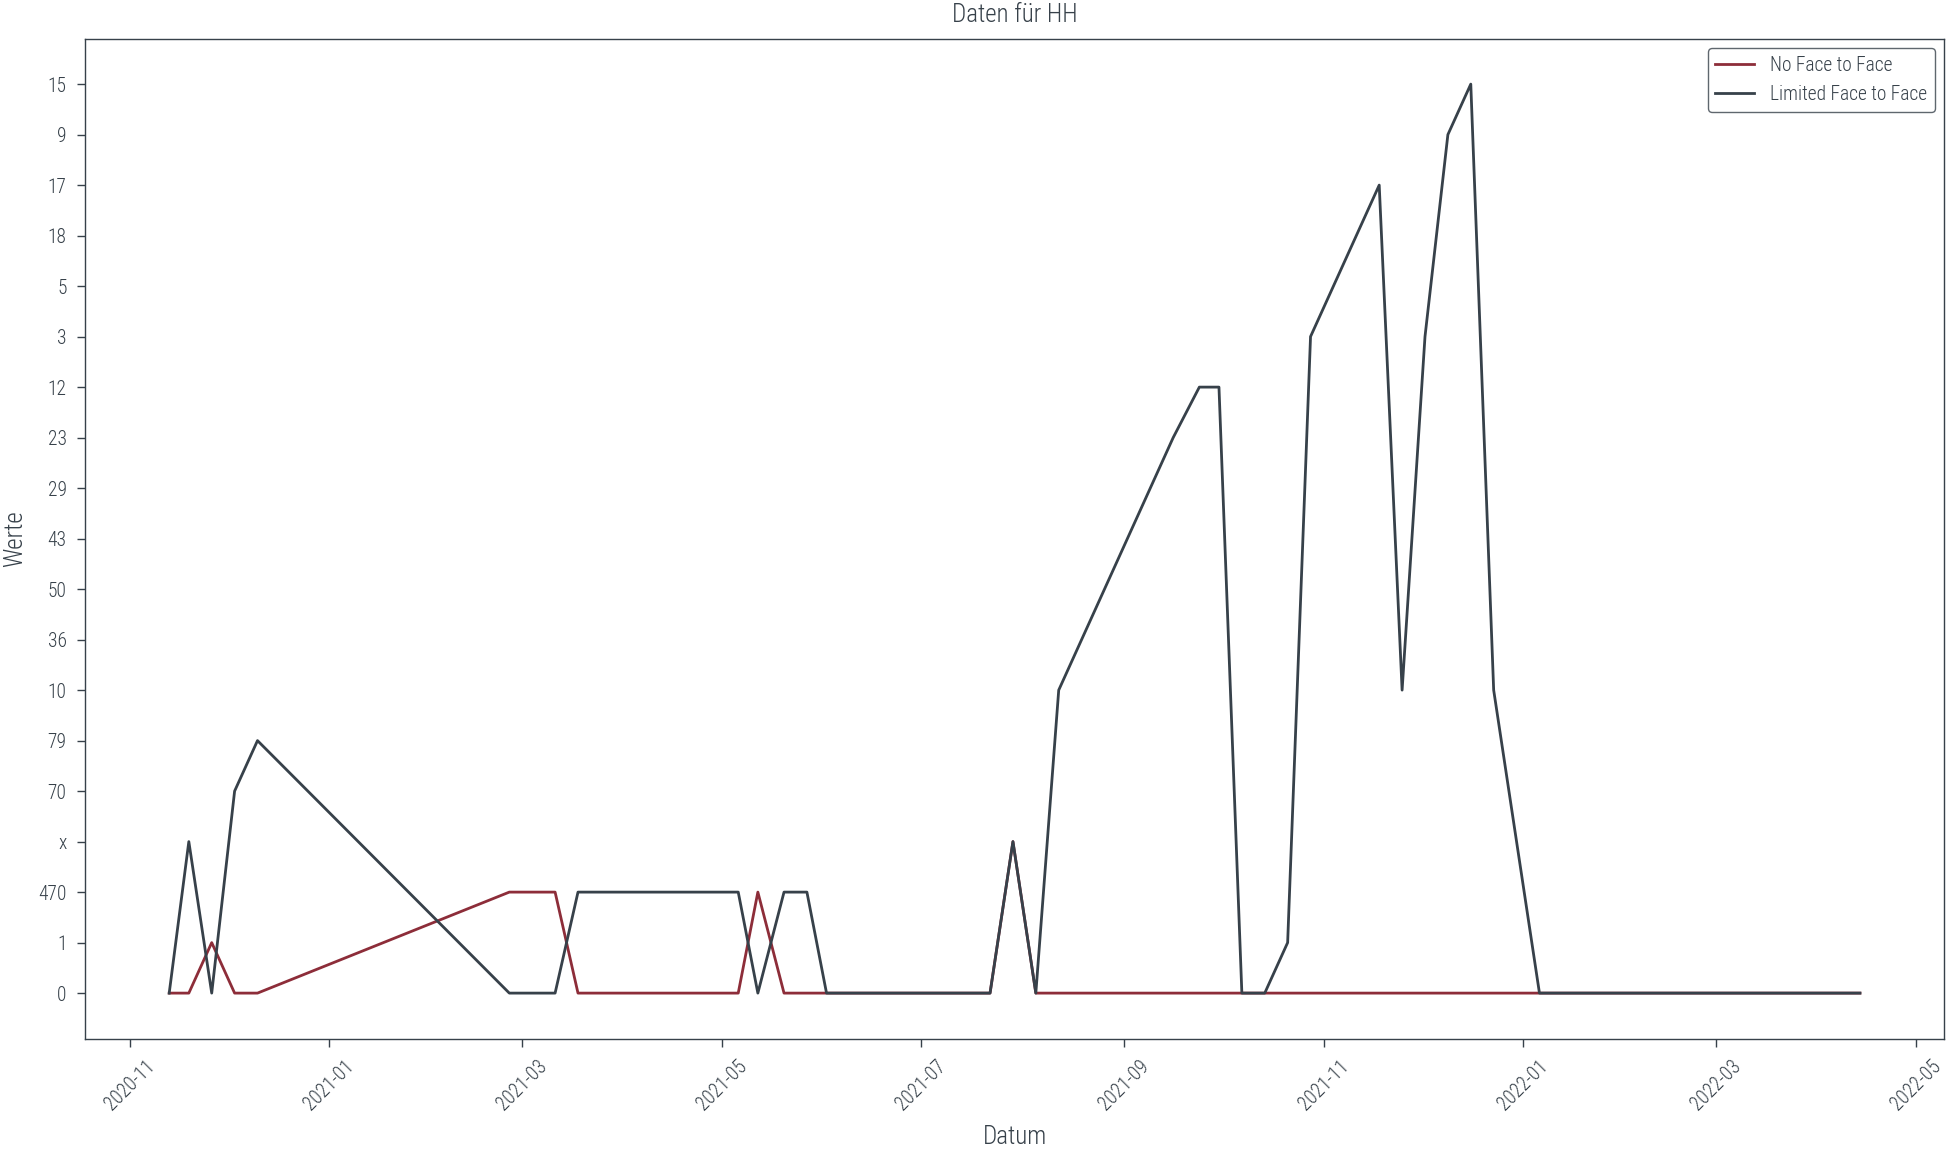

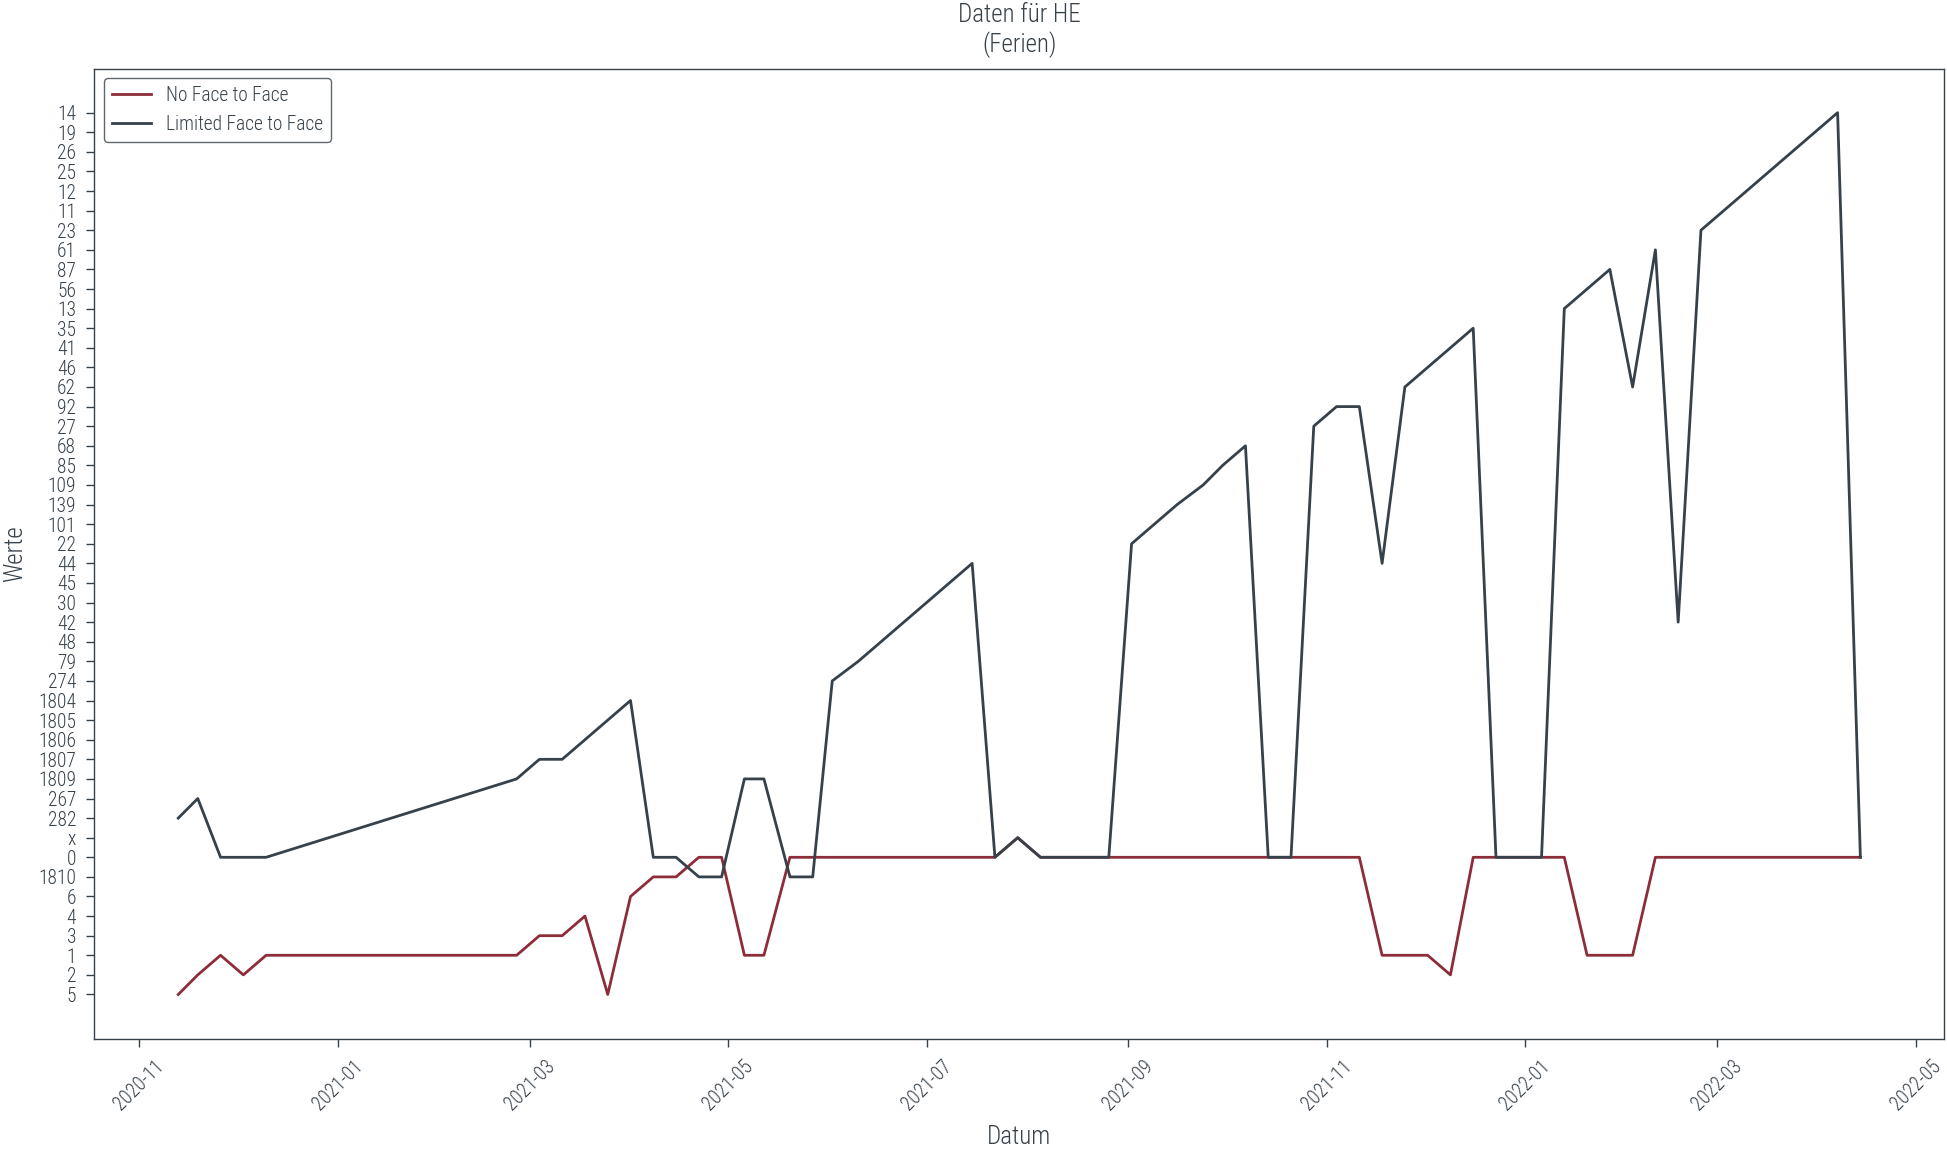

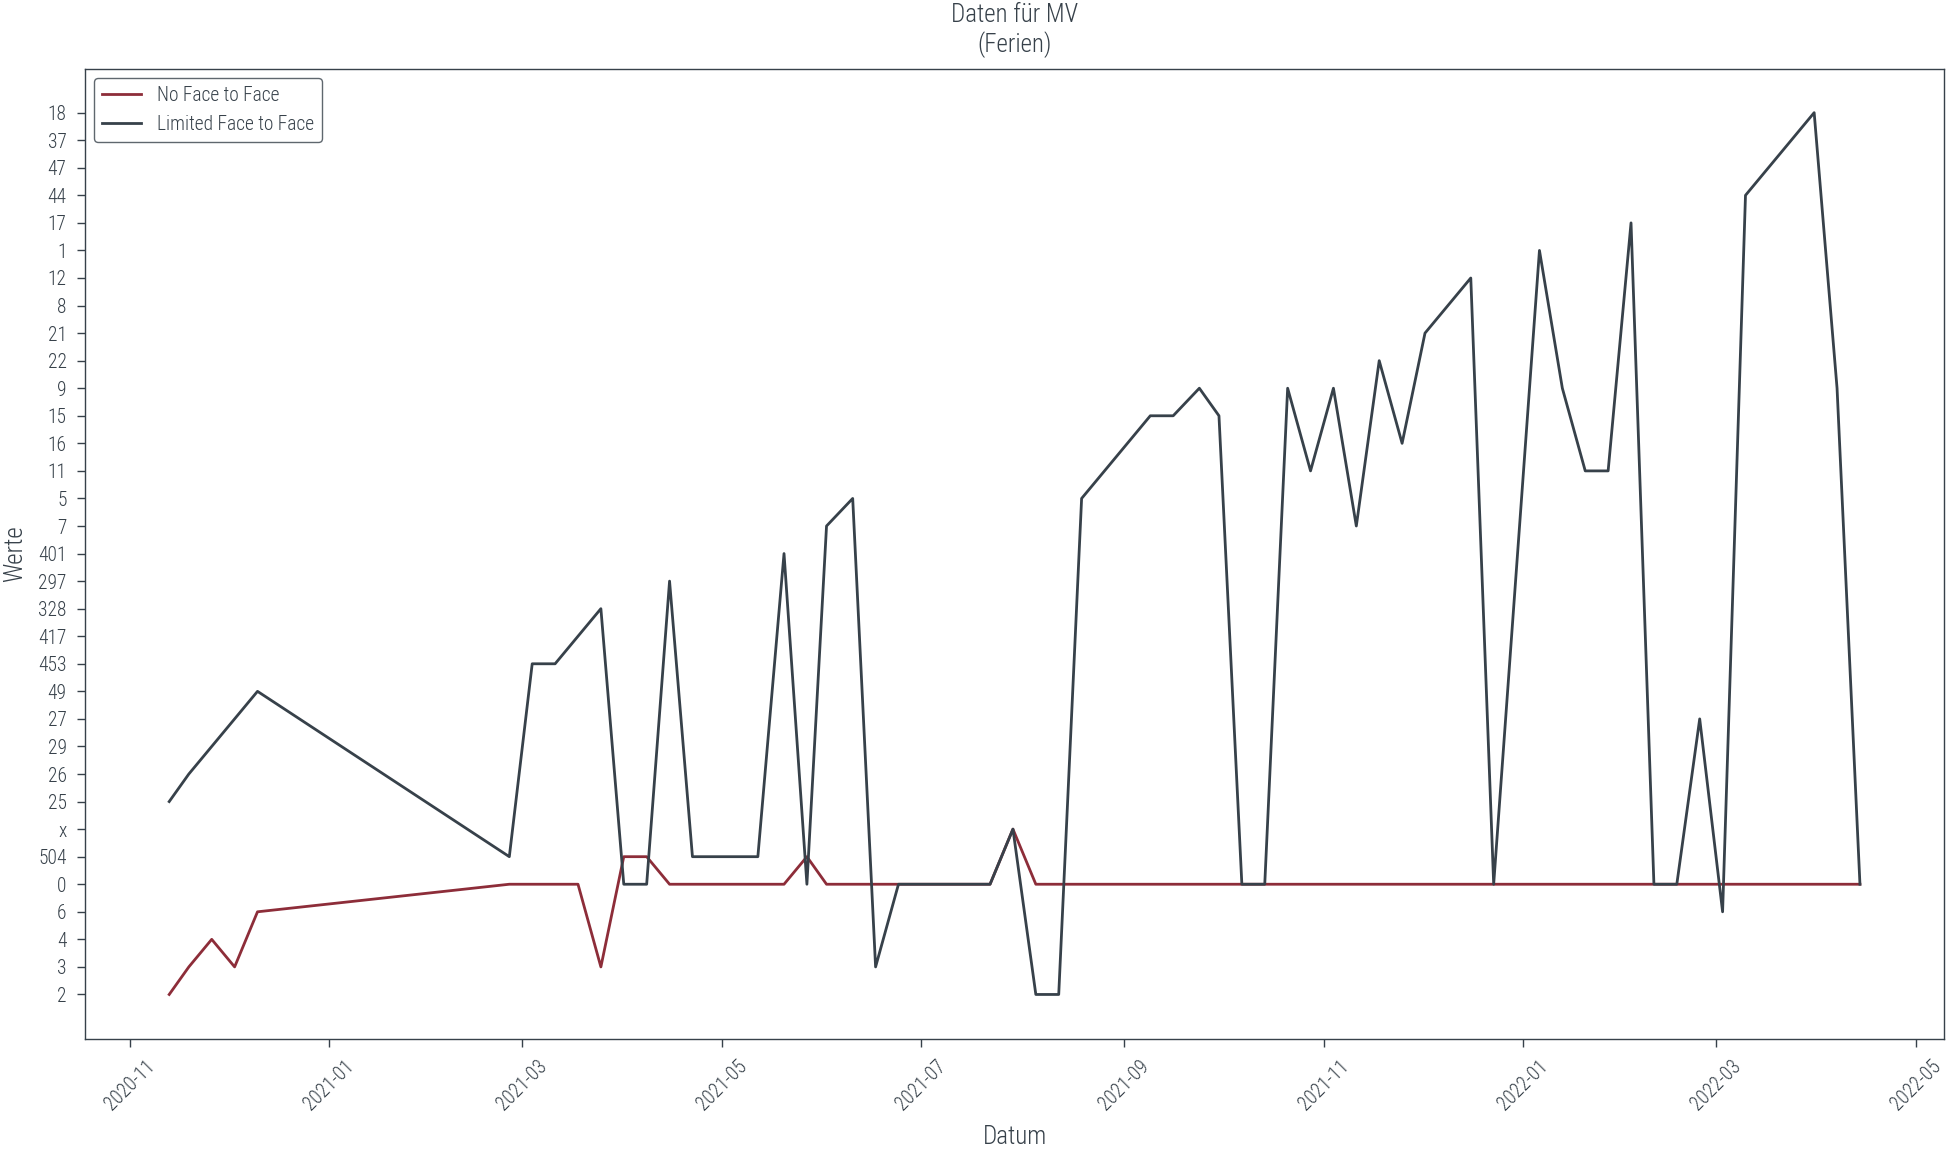

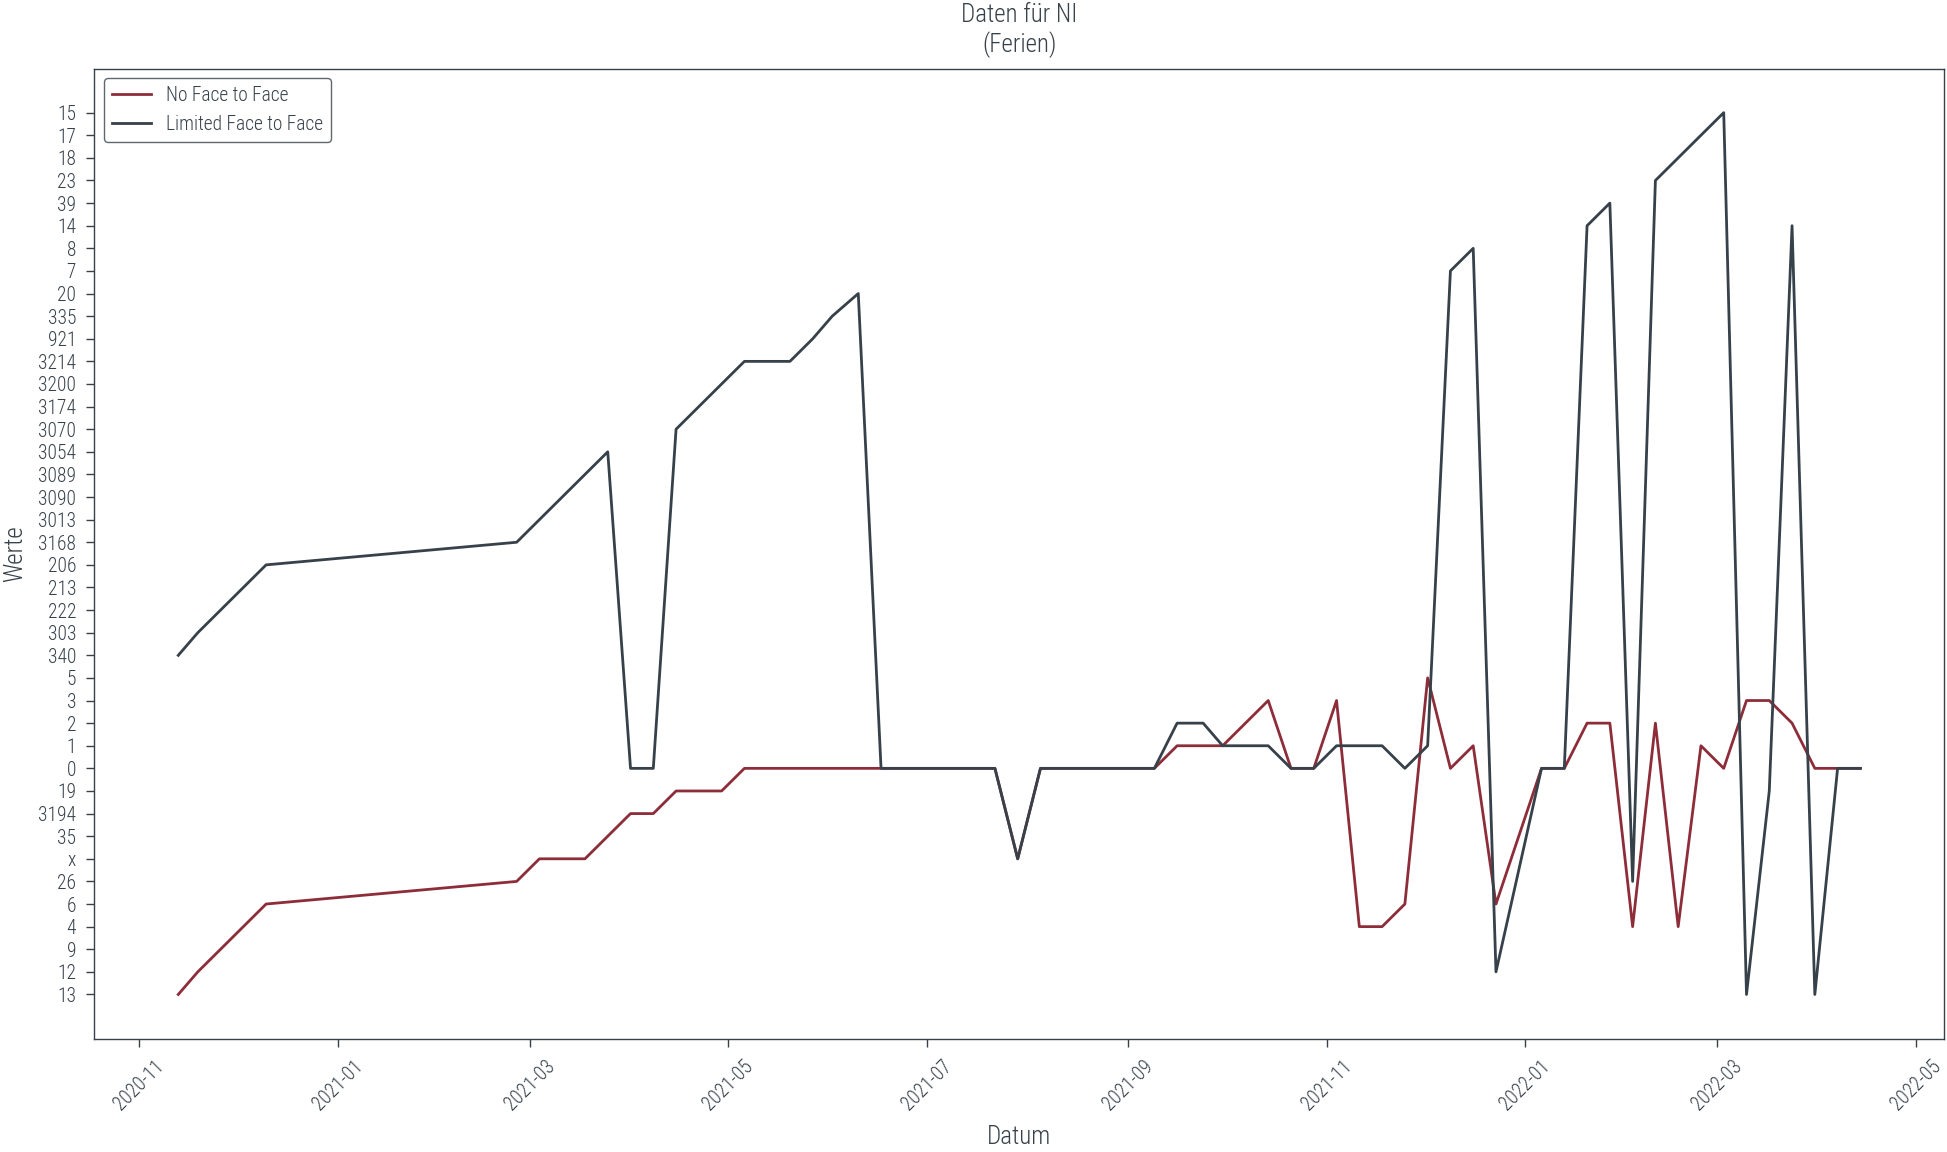

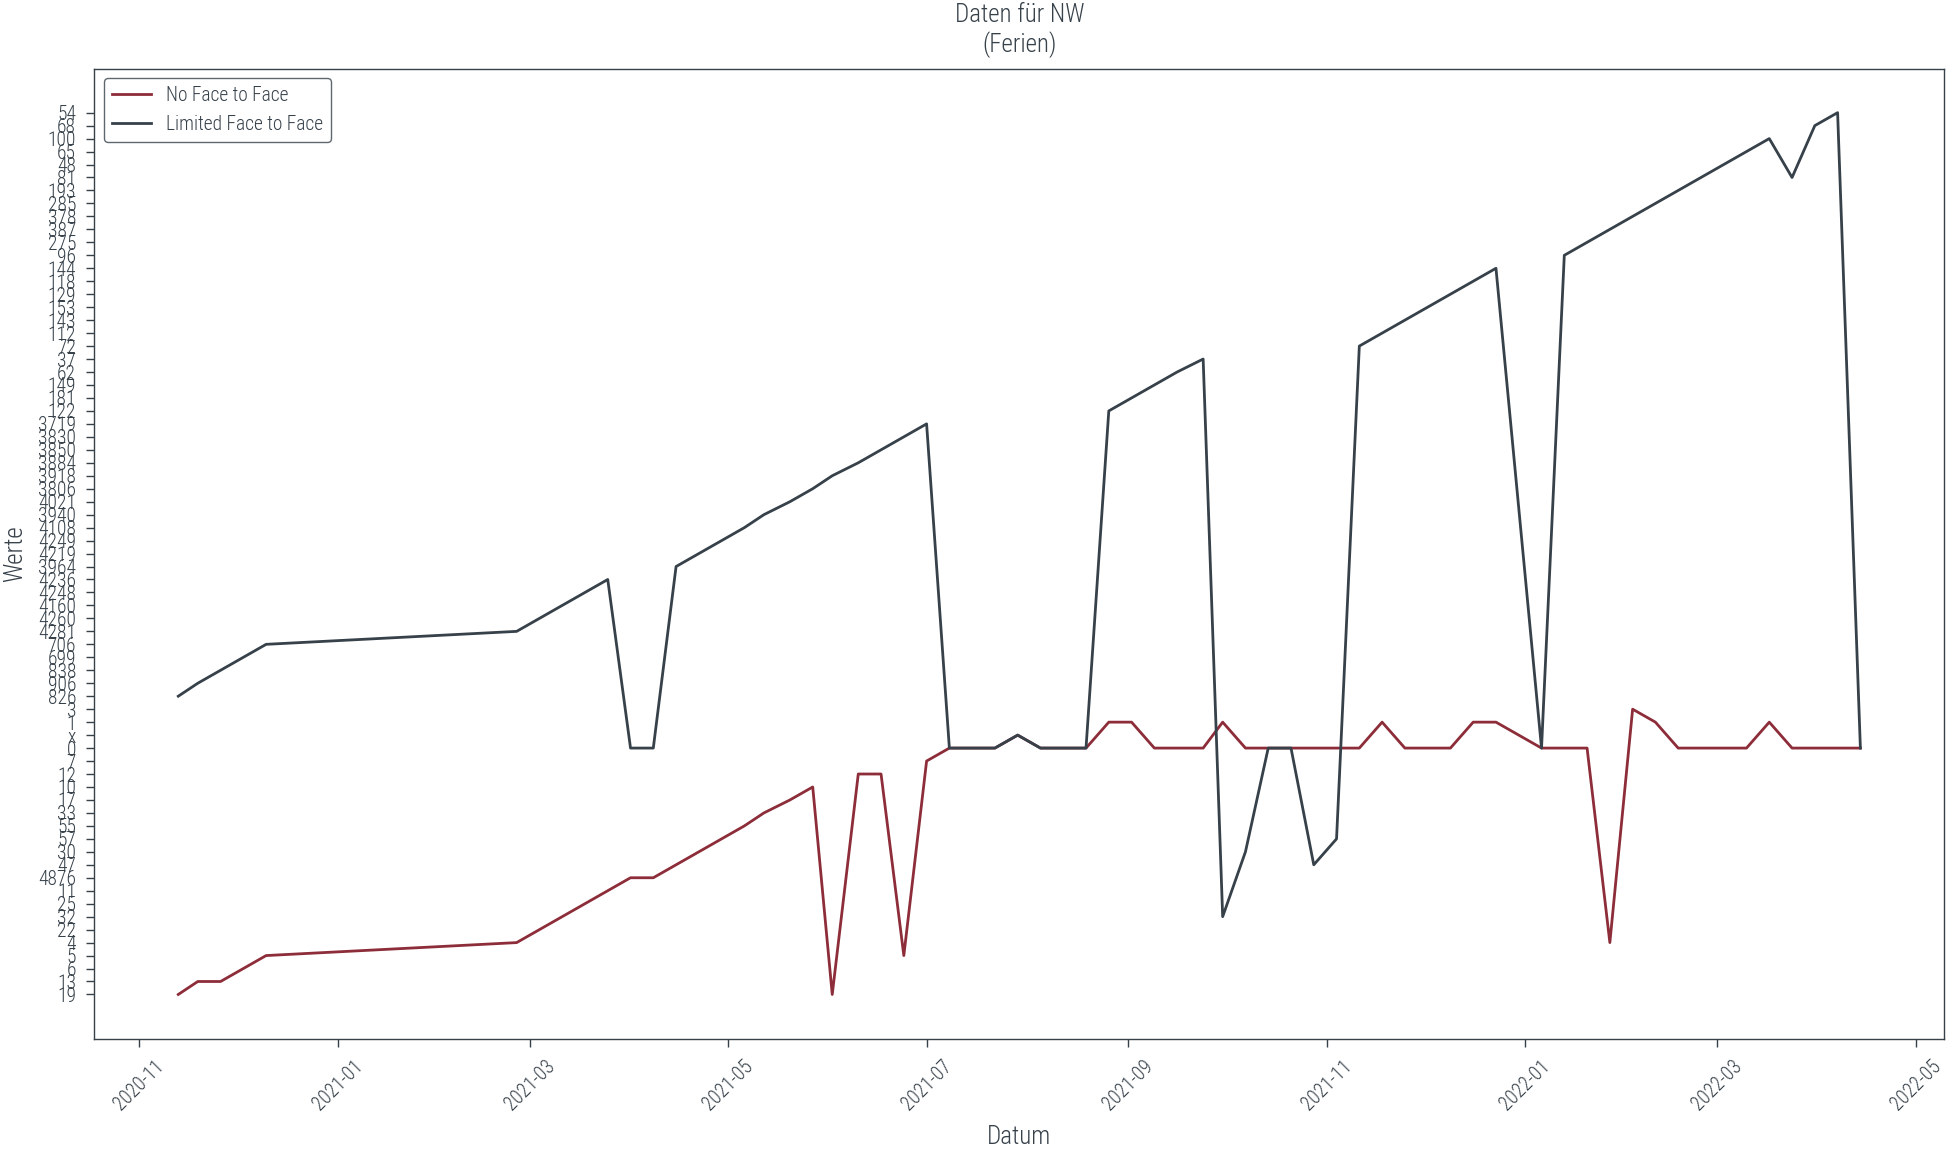

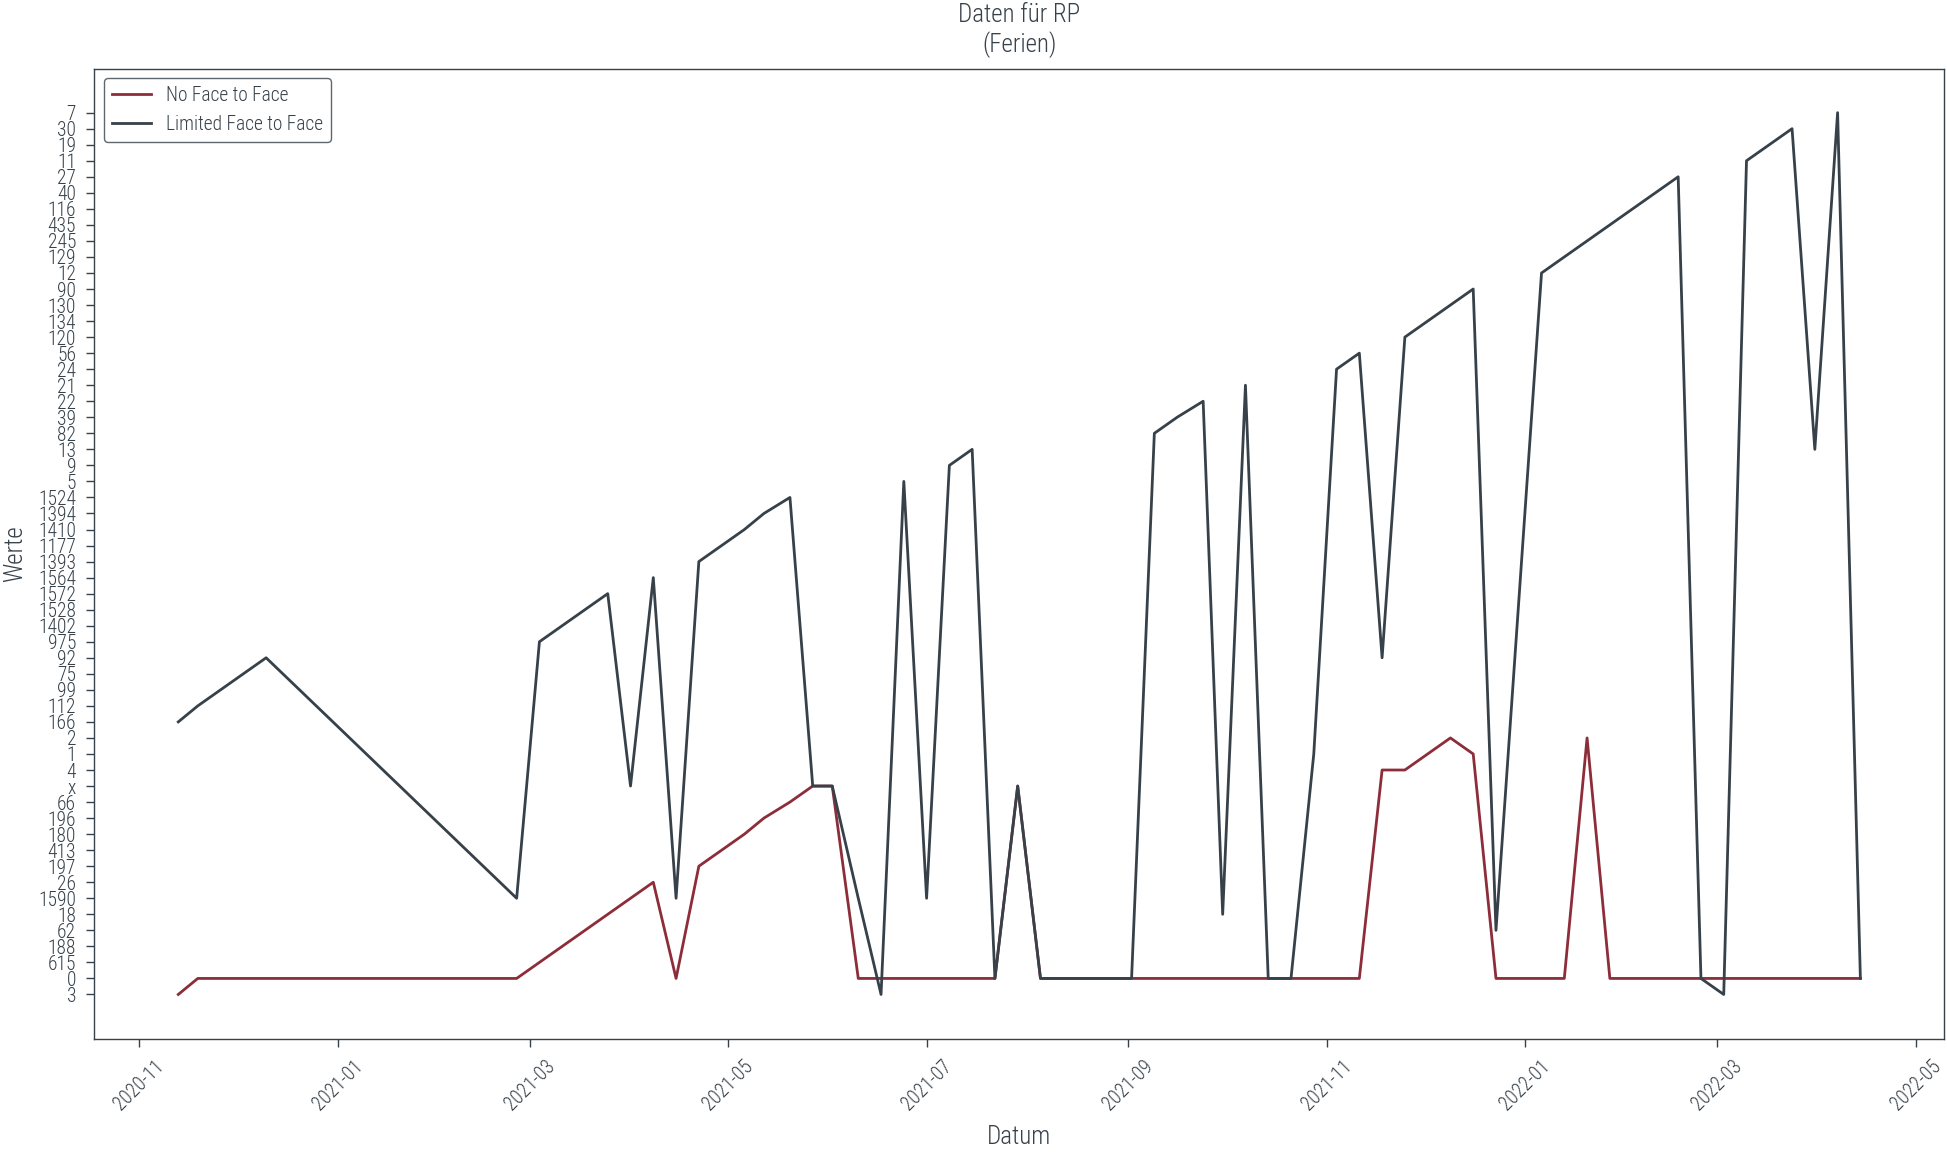

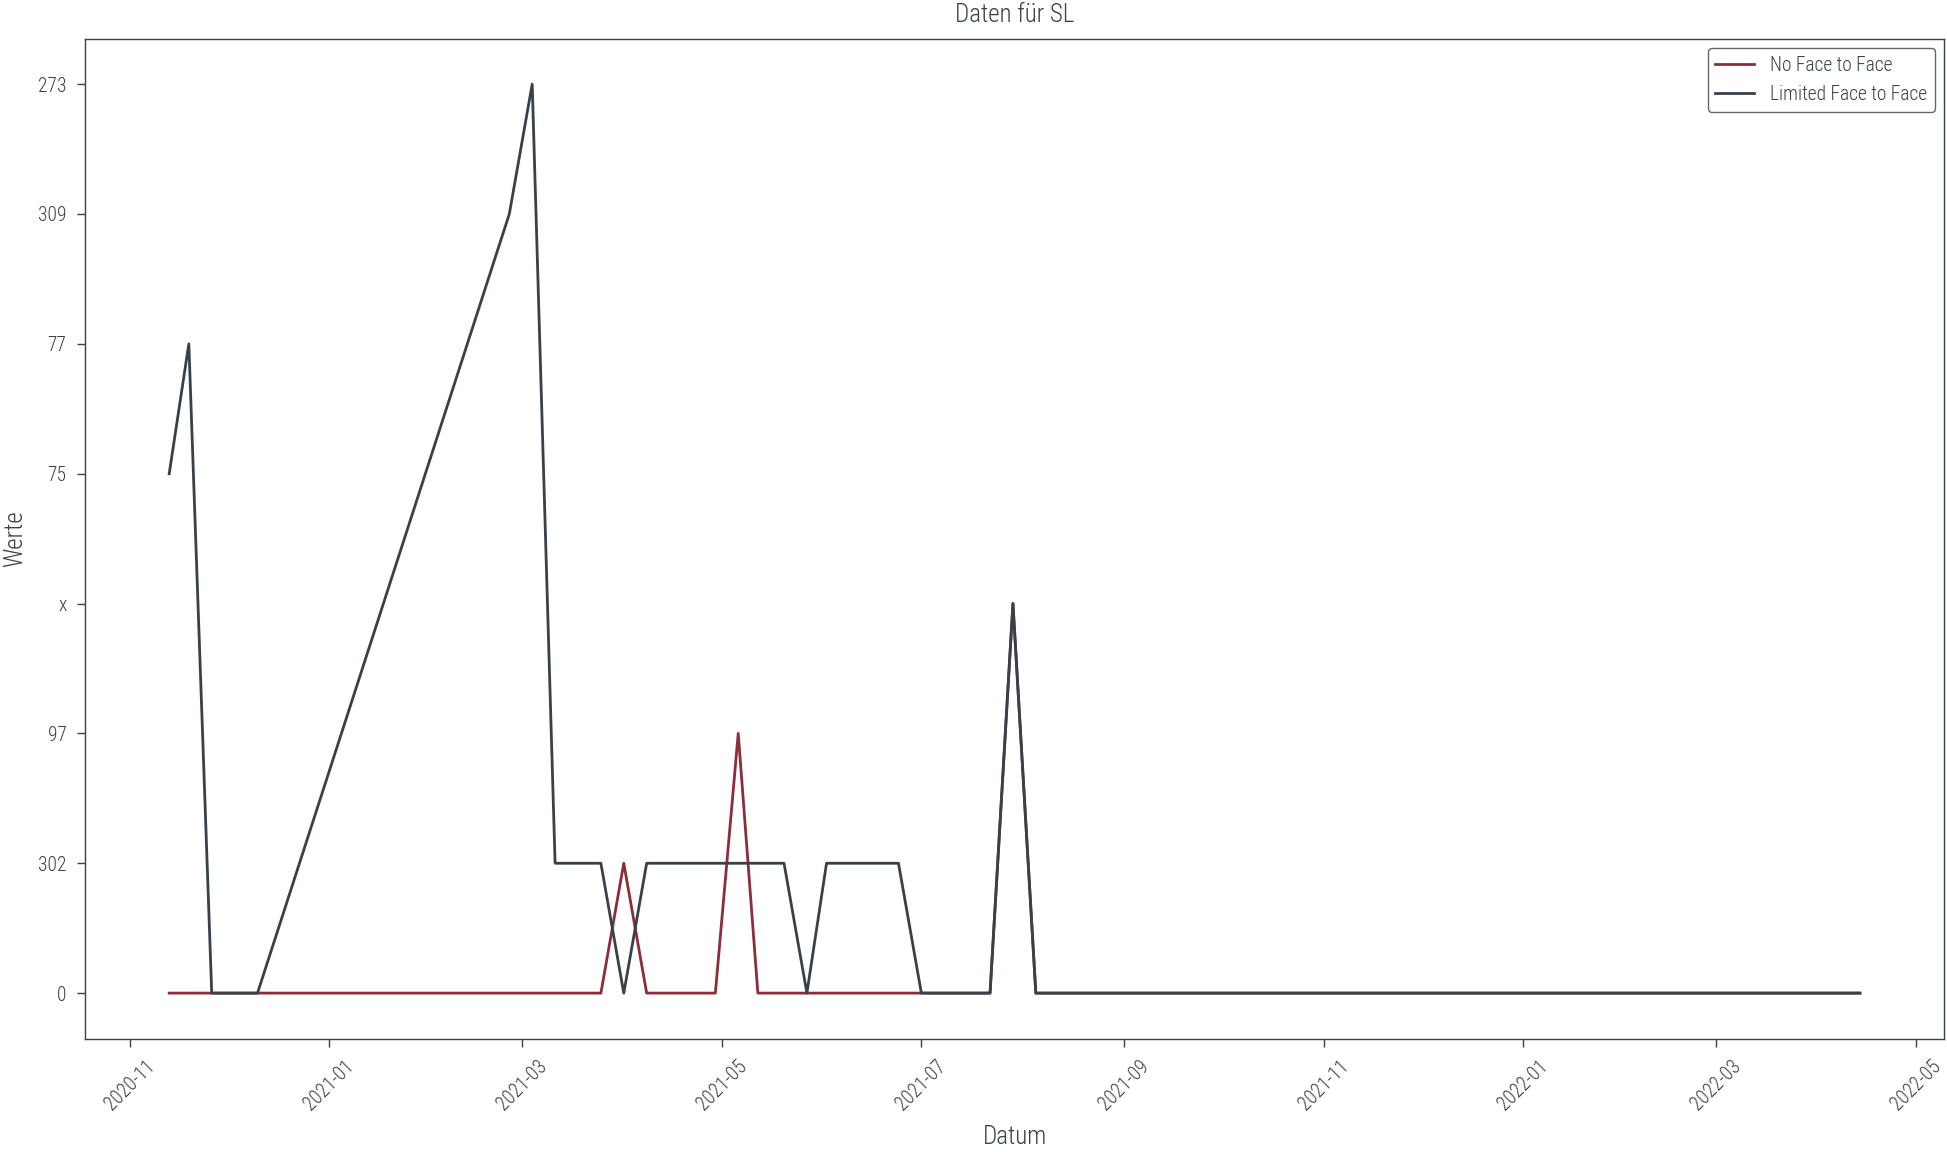

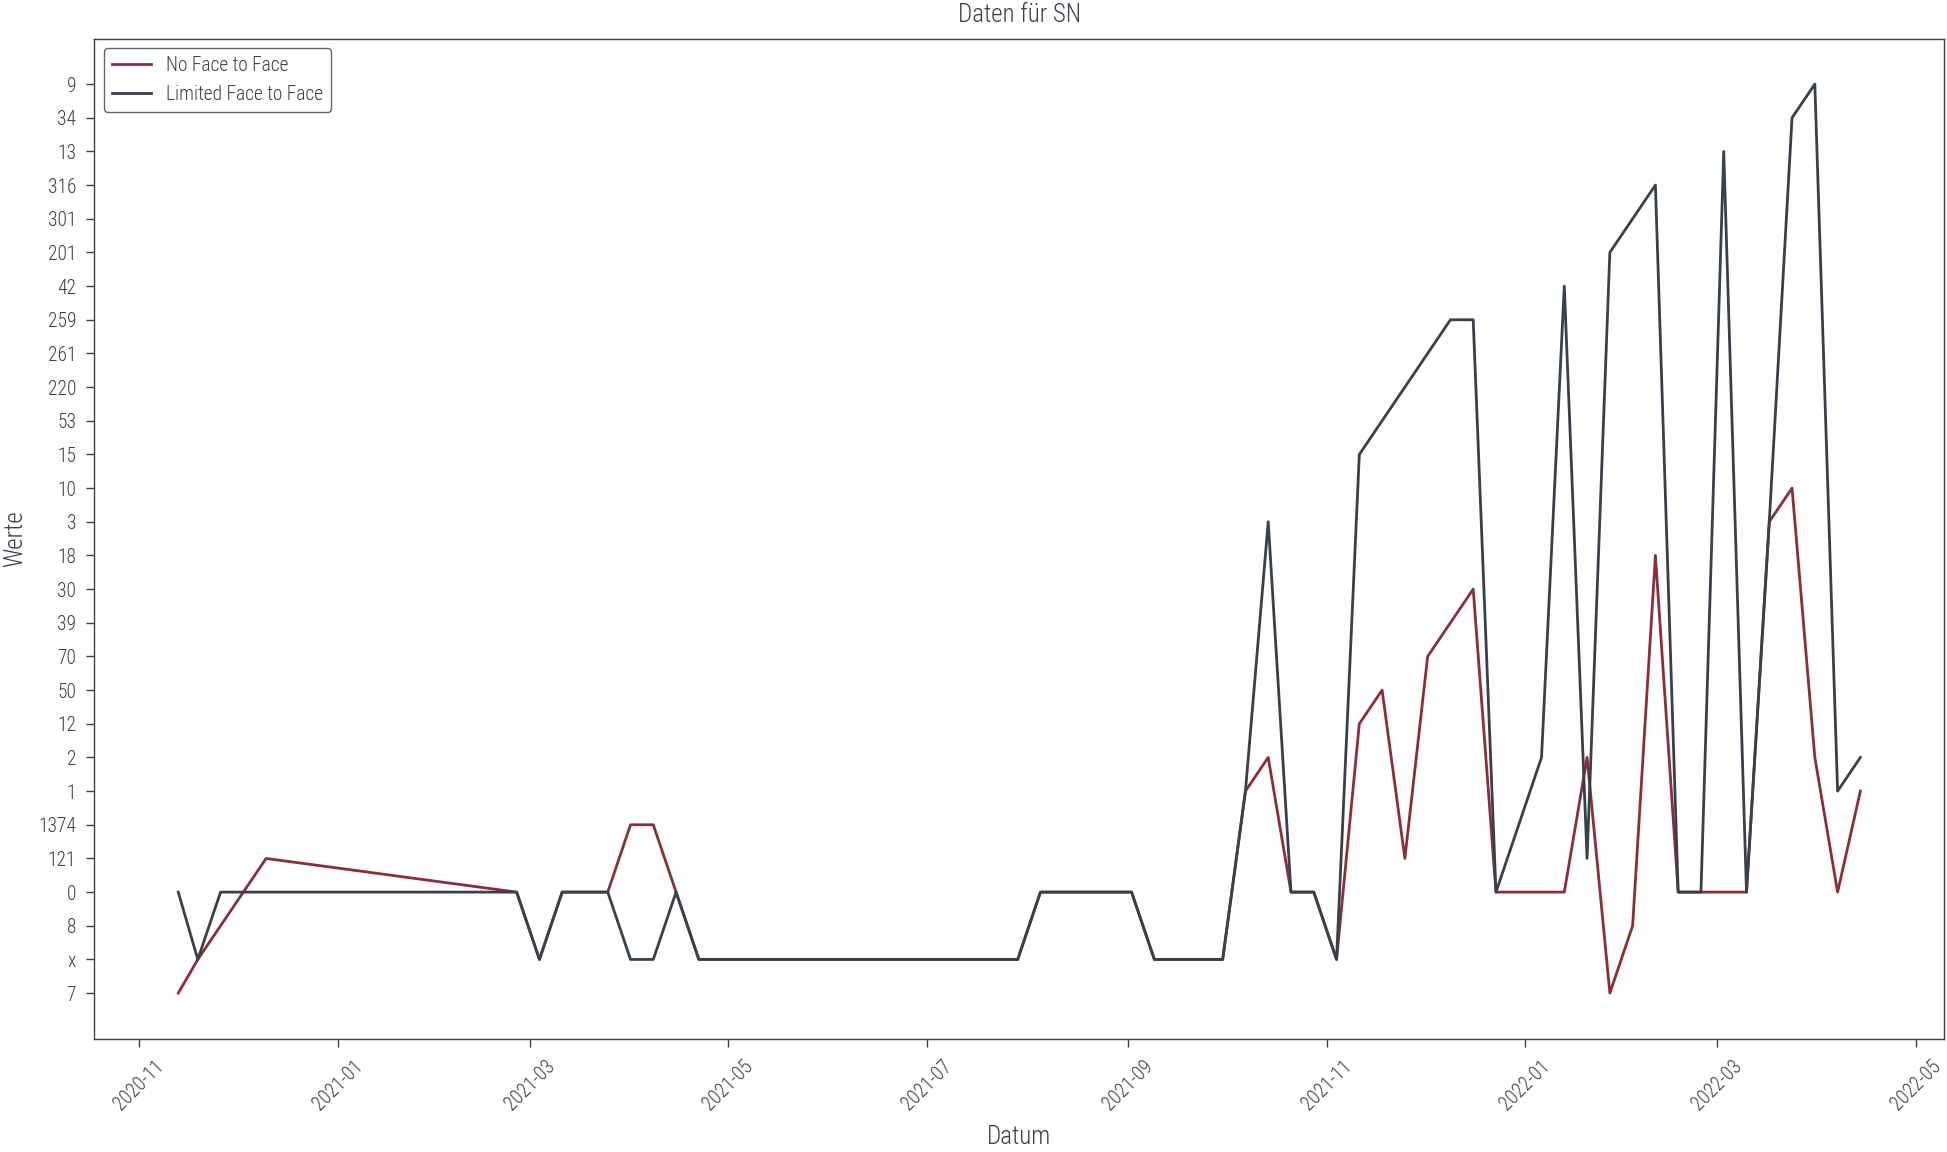

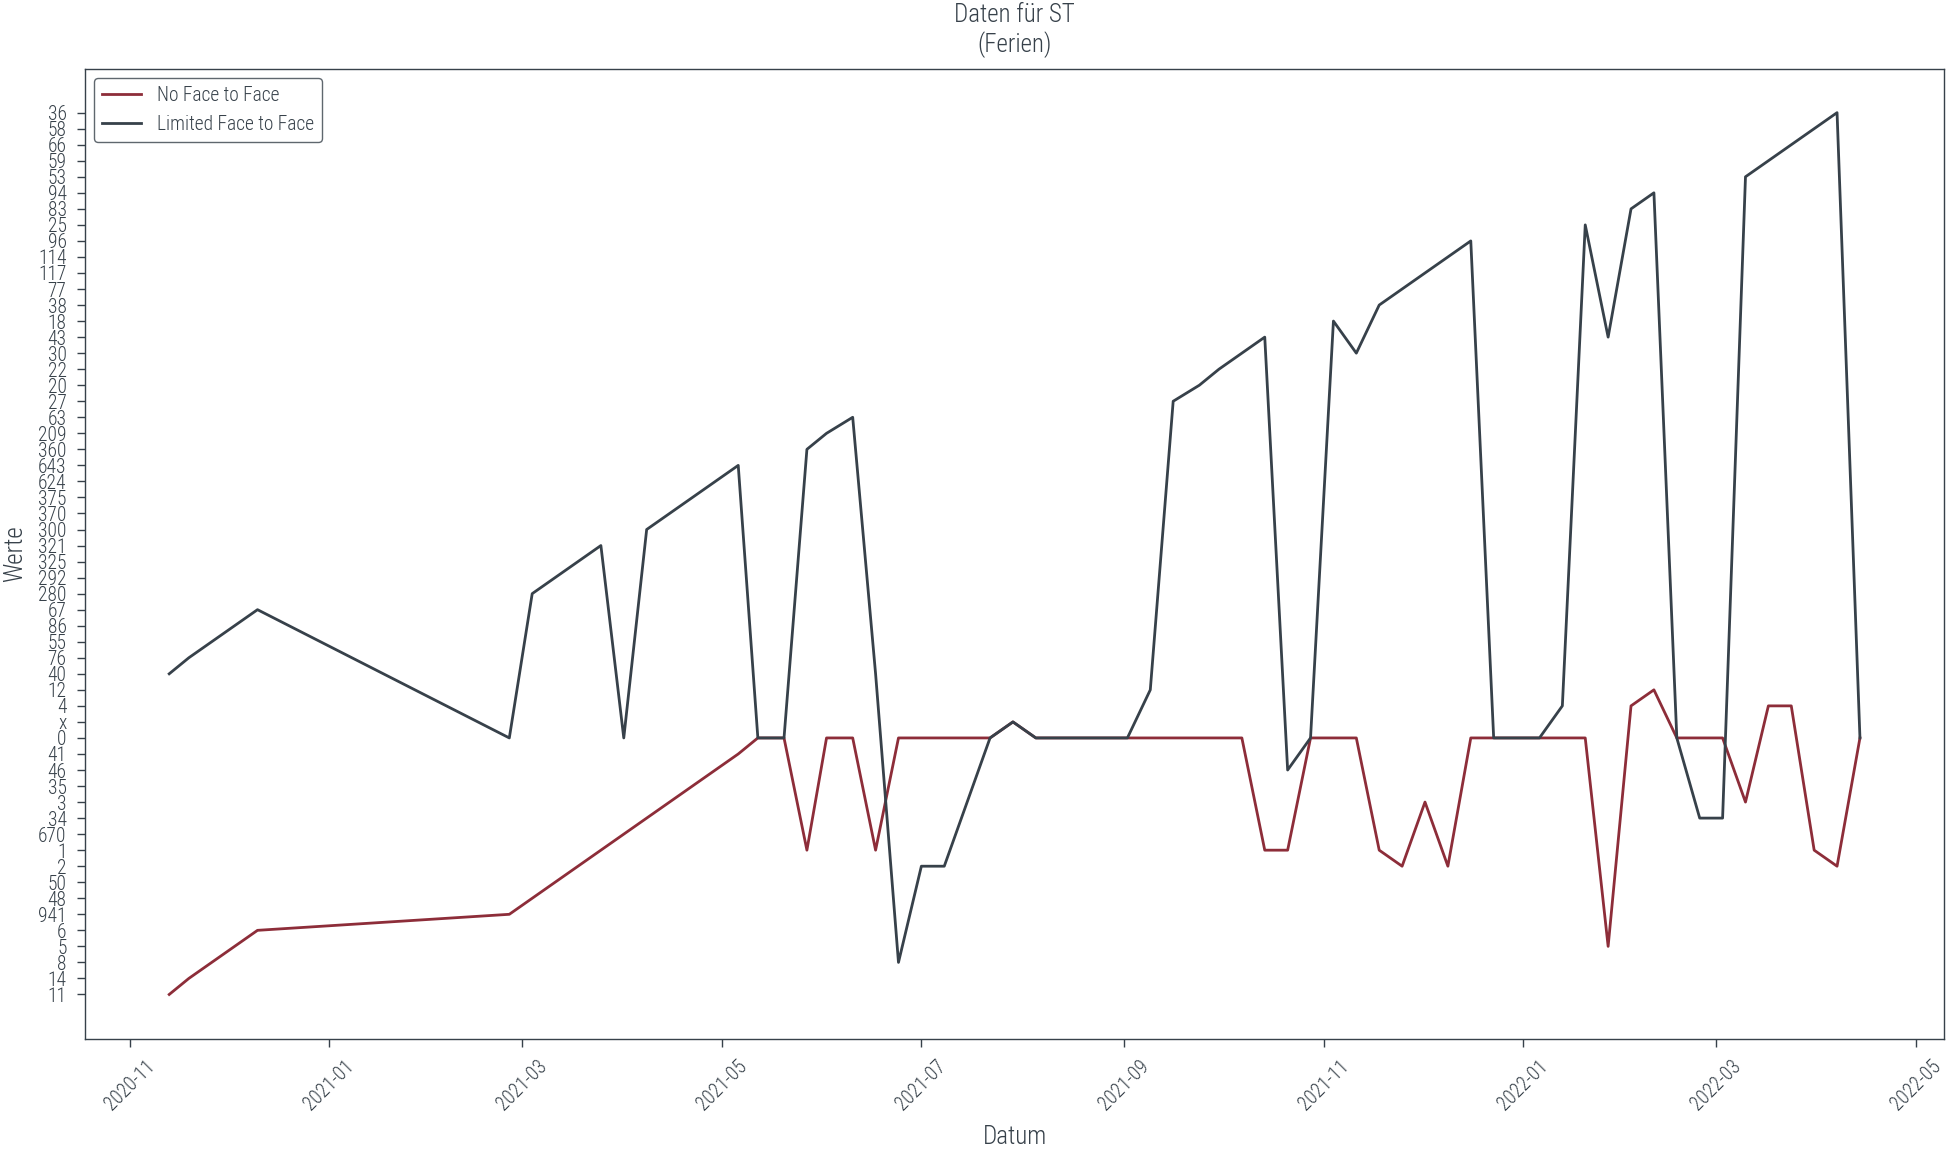

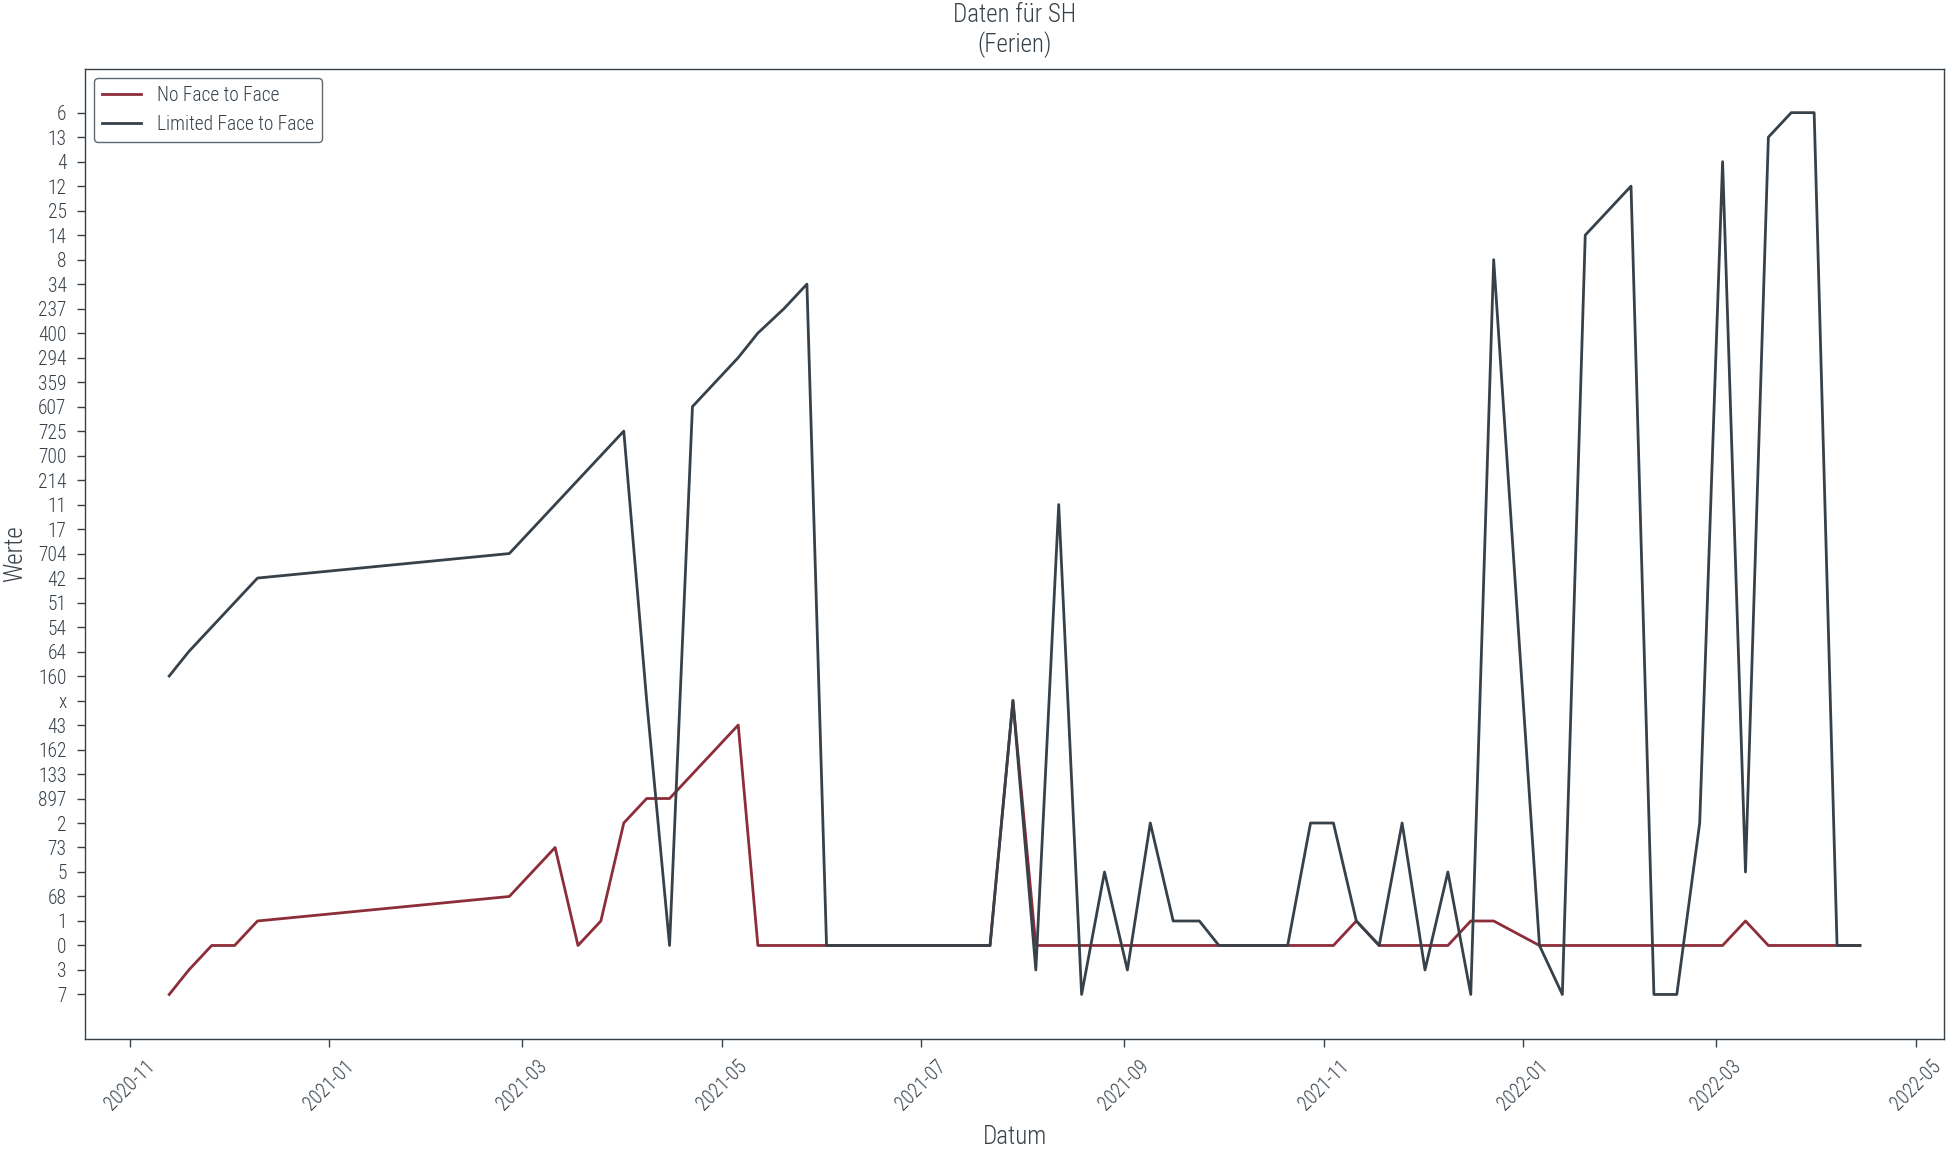

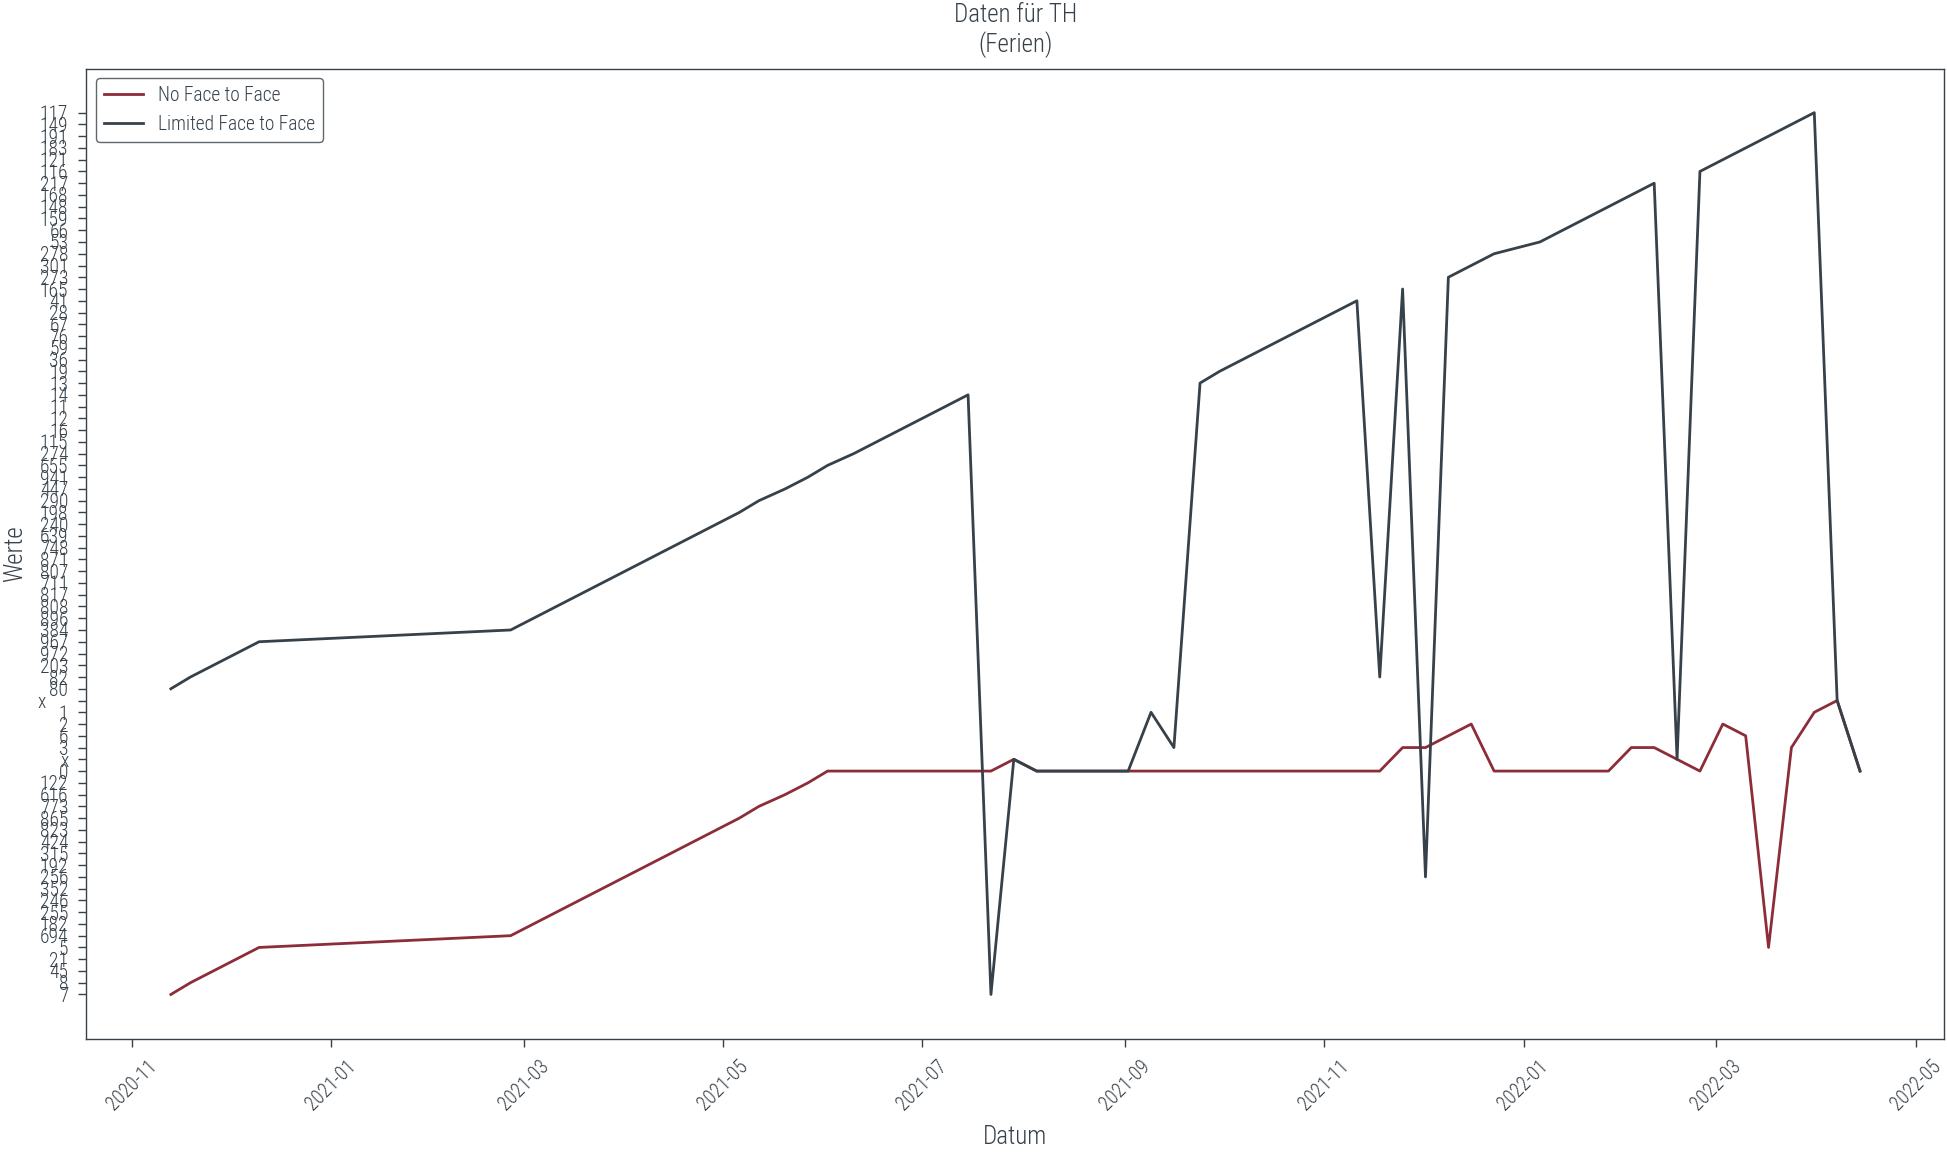

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Umwandlung der Listen in ein DataFrame
# data = pd.DataFrame({
#     'Date': pd.to_datetime(dates),
#     'State': states,
#     'No Face to Face': no_face_to_face_l,
#     'Limited Face to Face': limited_face_to_face_l
# })

# Einzigartige Daten und Staaten extrahieren
# unique_dates = data['Date'].unique()
# unique_states = data['State'].unique()

# Erstellen eines Plots für jeden Staat
for idx,state in enumerate(states):
    #state_data = data[data['State'] == state]

    no_face_to_face = [x[idx] for x in no_face_to_face_l]
    limited_face_to_face = [x[idx] for x in limited_face_to_face_l]


    plt.figure(figsize=(10, 6))
    plt.plot(dates, no_face_to_face, label='No Face to Face')
    plt.plot(dates, limited_face_to_face, label='Limited Face to Face')

    plt.title(f'Daten für {state}')
    plt.xlabel('Datum')
    plt.ylabel('Werte')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
